In [1]:
import numpy as np
import iberoSignalPro.preprocesa as ib
import matplotlib.pyplot as plt
import mne
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
import seaborn as sns
import networkx as nx

from ntwktools import *

# Load of connectivity matrix

In [2]:

Carga_10 = np.load('3Carga_10p01.npy', allow_pickle=True)
Carga_5 = np.load('3Carga_5p01.npy',  allow_pickle=True)
Carga_0 = np.load('3Carga_0p01.npy',  allow_pickle=True)

Carga_5 = Carga_5[:-2]
Carga_0 = Carga_0[:-2]


Carga_10.shape, Carga_5.shape, Carga_0.shape

((41,), (41,), (41,))

In [3]:
ch_names = np.array(['HRV', 'RRV', 'EnvAnta', 'EnvAgo', 'Posicion', 'FC3', 'FCz', 'FC4',
       'CP3', 'C3', 'C1', 'Cz', 'C2', 'C4', 'CP4', 'P3', 'Pz', 'P4', 'O1',
       'Oz', 'O2'], dtype=object)

In [4]:
def get_sum_matriz(Carga, band, norm = False, max = None):
    matriz_act = []
    matriz_rep = []
    for i in range(0, len(Carga)):
        matriz_act.append(Carga[i].get_network(band, band).matriz_act / Carga[i].get_network(band, band).matriz_act.max())
        matriz_rep.append(Carga[i].get_network(band, band).matriz_rep / Carga[i].get_network(band, band).matriz_rep.max())
    print(np.array(matriz_act).shape)
    print(np.array(matriz_rep).shape)
    matriz_act = np.array(matriz_act)
    matriz_rep = np.array(matriz_rep)
    matriz_act = np.sum(matriz_act, axis=0)
    matriz_rep = np.sum(matriz_rep, axis=0)
    if norm == True:
        if max == None:
            max = matriz_act.max()
        matriz_act = matriz_act / max
        matriz_rep = matriz_rep / max
    return matriz_act, matriz_rep



def get_mean_matriz(Carga, band, norm = False):
    matriz_act = []
    matriz_rep = []
    for i in range(0, len(Carga)):
        matriz_act.append(Carga[i].get_network(band, band).matriz_act / Carga[i].get_network(band, band).matriz_act.max())
        matriz_rep.append(Carga[i].get_network(band, band).matriz_rep / Carga[i].get_network(band, band).matriz_rep.max())
    print(np.array(matriz_act).shape)
    print(np.array(matriz_rep).shape)
    matriz_act = np.array(matriz_act)
    matriz_rep = np.array(matriz_rep)
    matriz_act = np.mean(matriz_act, axis=0)
    matriz_rep = np.mean(matriz_rep, axis=0)
    if norm == True:
        matriz_act = matriz_act / matriz_act.max()
        matriz_rep = matriz_rep / matriz_rep.max()
    return matriz_act, matriz_rep



def get_sum_matriz(Cargas, band = "mu", same_windows = True, ch_names = None, option = None):
    if ch_names is None:
        ch_names = np.array(['HRV', 'RRV', 'EnvAnta', 'EnvAgo', 'Posicion', 'FC3', 'FCz', 'FC4', 'CP3', 'C3', 'C1', 'Cz', 'C2', 'C4', 'CP4', 'P3', 'Pz', 'P4', 'O1','Oz', 'O2'], dtype=object)
    
    matriz_act_all = []
    matriz_rep_all = []

    for carga in Cargas:
        if same_windows:
            len_windows_act = carga.get_network(band, band).array_mat_act.shape[0]
            len_windows_rep = carga.get_network(band, band).array_mat_rep.shape[0]
            len_windows = min(len_windows_act, len_windows_rep)


        
        if same_windows:
            matrices_actividad = carga.get_network(band, band).array_mat_act[:len_windows]
        else:
            matrices_actividad = carga.get_network(band, band).array_mat_act
        
        for test_mat in matrices_actividad:
            matriz_act_all.append(test_mat)
            
    
        if same_windows:
            matrices_reposo = carga.get_network(band, band).array_mat_rep[:len_windows]
        else:
            matrices_reposo = carga.get_network(band, band).array_mat_rep
        
        
        
        for test_mat in matrices_reposo:
            matriz_rep_all.append(test_mat)

                
    #max_win = np.array(max_win)
    matriz_act_all = np.array(matriz_act_all)
    matriz_rep_all = np.array(matriz_rep_all)
    if option is None:
        return matriz_act_all, matriz_rep_all
    elif option == "mean":
        matriz_act_all = np.mean(matriz_act_all, axis=0)
        matriz_rep_all = np.mean(matriz_rep_all, axis=0)
        return matriz_act_all, matriz_rep_all
    elif option == "sum":
        matriz_act_all = np.sum(matriz_act_all, axis=0)
        matriz_rep_all = np.sum(matriz_rep_all, axis=0)
        return matriz_act_all, matriz_rep_all
    

## Band selection

In [5]:
band = "mu"
print("****************************")
print(f"\t{band}")
print("****************************")

****************************
	mu
****************************


In [6]:

act_10, rep_10 = get_sum_matriz(Carga_10,band, option = "mean")
act_5, rep_5 = get_sum_matriz(Carga_5, band, option = "mean")
act_0, rep_0 = get_sum_matriz(Carga_0, band, option = "mean")


In [7]:
act_10.shape

(21, 21)

In [8]:
print(act_10.max())
print(rep_10.max())
print(act_5.max())

0.9585798816568047
0.9408284023668639
0.9875


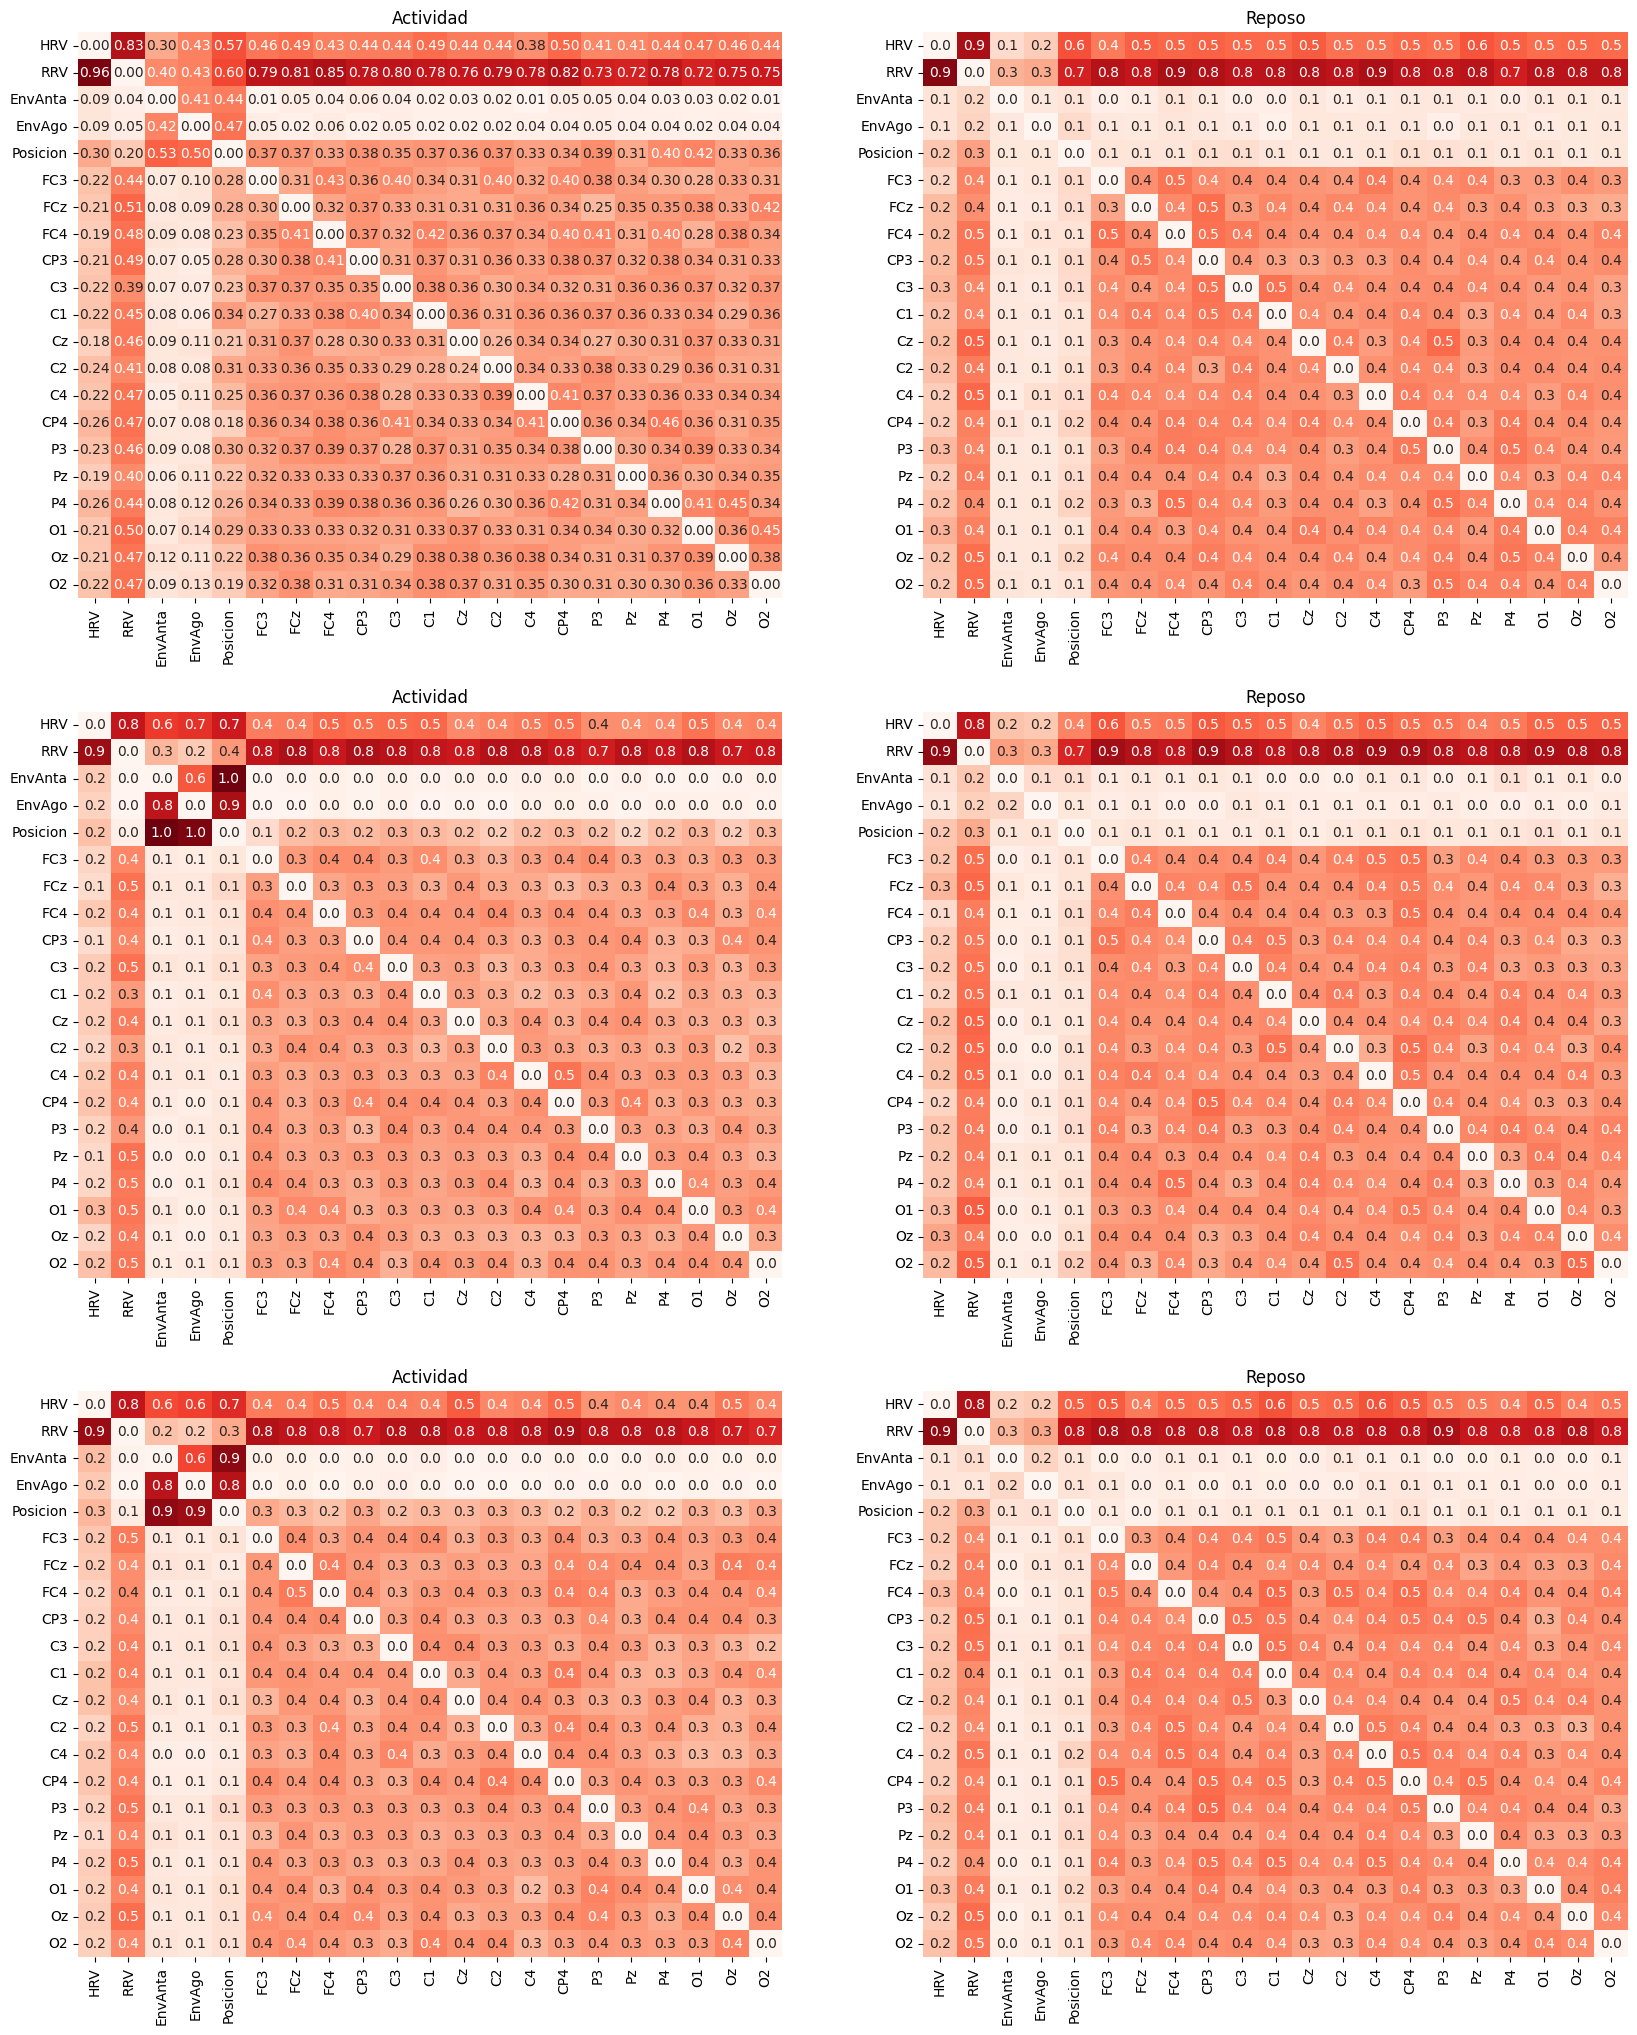

In [10]:
thresh = 0
maxi = 1
mini = 0

plt.figure(figsize=(20, 25))

plt.subplot(3, 2, 1)
sns.heatmap((act_10 > thresh).astype(int) * act_10, cmap='Reds', annot=True, cbar=False, xticklabels=ch_names, yticklabels=ch_names, vmax=maxi, vmin=mini, fmt=".2f")
plt.title(f'Actividad')

plt.subplot(3, 2, 2)
sns.heatmap((rep_10 > thresh).astype(int) *  rep_10, cmap='Reds', annot=True, cbar=False, xticklabels=ch_names, yticklabels=ch_names, vmax=maxi, vmin=mini, fmt=".1f")

plt.title(f'Reposo')

plt.subplot(3, 2, 3)
sns.heatmap((act_5 > thresh).astype(int) * act_5, cmap='Reds', annot=True, cbar=False, xticklabels=ch_names, yticklabels=ch_names, vmax=maxi, vmin=mini, fmt=".1f")
plt.title(f'Actividad')

plt.subplot(3, 2, 4)
sns.heatmap((rep_5 > thresh).astype(int) * rep_5, cmap='Reds', annot=True, cbar=False, xticklabels=ch_names, yticklabels=ch_names, vmax=maxi, vmin=mini, fmt=".1f")

plt.title(f'Reposo')
plt.subplot(3, 2, 5)
sns.heatmap((act_0 > thresh).astype(int) * act_0, cmap='Reds', annot=True, cbar=False, xticklabels=ch_names, yticklabels=ch_names, vmax=maxi, vmin=mini, fmt=".1f")

plt.title(f'Actividad')

plt.subplot(3, 2, 6)
sns.heatmap((rep_0 > thresh).astype(int) * rep_0, cmap='Reds', annot=True, cbar=False, xticklabels=ch_names, yticklabels=ch_names, vmax=maxi, vmin=mini, fmt=".1f")

plt.title(f'Reposo')
plt.show()

In [11]:
y, x, ro, deg, ch_names_2 =ib.eloc_reader('../codigo/eloc16_bueno.txt')


new_x = np.array([x.min() - 0.021,     x.min() - 0.1,    x.max() + 0.1,  x.max() + 0.02, 0])
new_y = np.array([y.max() + 0.25,   y.max() + 0.25,     y.max() + 0.25, y.max() + 0.25, y.max() + 0.25])

x = np.concatenate((new_x, x))
y = np.concatenate((new_y, y))

In [12]:
def plot_network_with_subplots(mu, x, y, matriz_conectividad, node_name, thresh=0.07, title=None, subplot_position=111):
    matriz_conectividad = ((matriz_conectividad > thresh).astype(int) * matriz_conectividad)
    # Crear el grafo
    G = nx.DiGraph()  

    # Agregar nodos al grafo con las coordenadas y nombres de los canales
    for i, name in enumerate(mu):
        G.add_node(i, pos=(x[i], y[i]), label=name)

    # Agregar aristas al grafo basado en la matriz de conectividad
    for i in range(matriz_conectividad.shape[0]):
        for j in range(matriz_conectividad.shape[1]):
            if matriz_conectividad[i, j]:
                G.add_edge(i, j, weight=matriz_conectividad[i, j] * 5)

    # Imprimir las métricas de centralidad
    #for node, centrality in betweenness_centrality.items():
        #print(f"Node {mu[node]}: Betweenness Centrality = {centrality}, In-Degree Centrality = {in_degree_centrality[node]}, Out-Degree Centrality = {out_degree_centrality[node]}")

    # Encontrar el índice del nodo central
    node_index = np.where(mu == node_name)[0][0]

    # Obtener el subgrafo del nodo central (vecinos)
    subgraph_nodes = list(G.predecessors(node_index)) + [node_index] + list(G.successors(node_index))
    subgraph_nodes_in = list(G.predecessors(node_index)) + [node_index]
    subgraph_nodes_out = [node_index] + list(G.successors(node_index))

    subgraph_outs = G.subgraph(subgraph_nodes_out)
    subgraph_ins = G.subgraph(subgraph_nodes_in)

    # Obtener posiciones y etiquetas de los nodos
    pos = nx.get_node_attributes(G, 'pos')
    labels = nx.get_node_attributes(G, 'label')

    node_size = [10 * G.degree(n) for n in G.nodes()]
    node_size_IN = [10 * G.degree(n) for n in subgraph_nodes_in]
    node_size_OUT = [10 * G.degree(n) for n in subgraph_nodes_out]
    
    
    # Crear el subplot
    plt.subplot(subplot_position)
    plt.title(title)

    nx.draw(G, pos, with_labels=True, labels=labels, node_size=node_size, node_color='gray', font_size=10, font_weight='bold', edge_color='gray', alpha=0.2)

    nx.draw(subgraph_ins, pos, with_labels=True, labels=labels, node_size=node_size_IN, node_color='blue', font_size=10, font_weight='bold', edge_color='blue', alpha=0.4)
    nx.draw(subgraph_outs, pos, with_labels=True, labels=labels, node_size=node_size_OUT, node_color='red', font_size=10, font_weight='bold', edge_color='red', alpha=0.4)

    nx.draw_networkx_nodes(G, pos, nodelist=[node_index], node_color='gold', node_size=10 * G.degree(node_index))


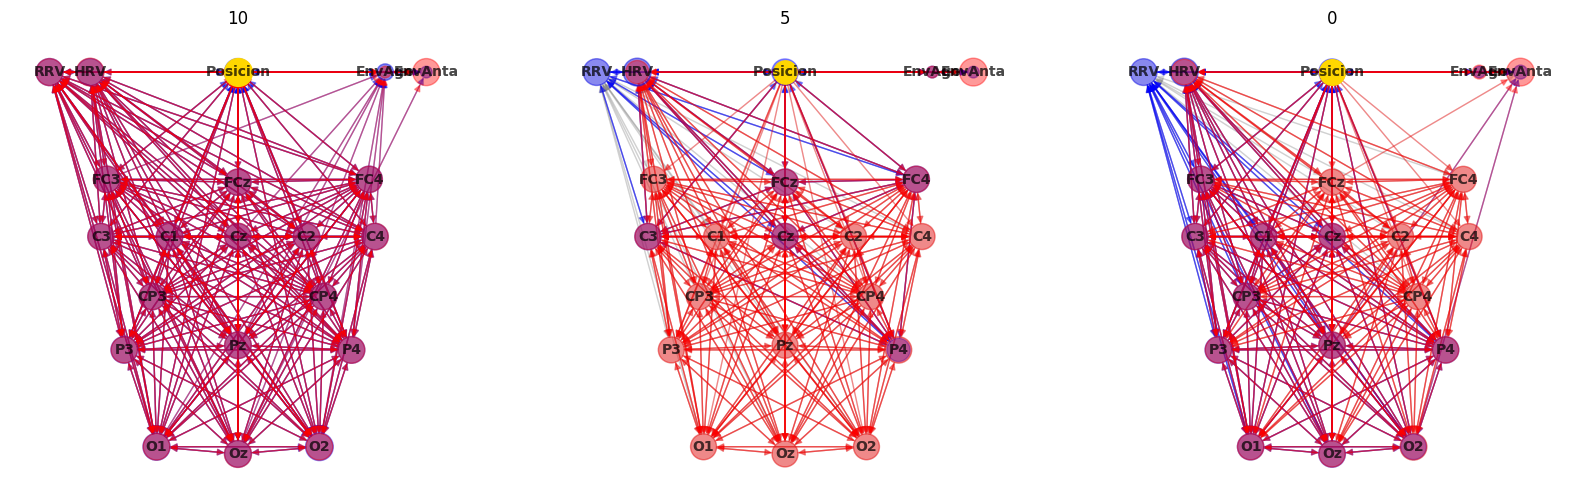

In [13]:

plt.figure(figsize=(20, 6))

nodo = 'Posicion'
thresh = 0.10

plot_network_with_subplots(ch_names, x, y, act_10, nodo, title='10', subplot_position=131, thresh=thresh)
plot_network_with_subplots(ch_names, x, y, act_5, nodo, title='5', subplot_position=132, thresh=thresh)
plot_network_with_subplots(ch_names, x, y, act_0, nodo, title='0', subplot_position=133, thresh=thresh)

plt.show()

# Generation of submatrix 

In [14]:
def generar_matriz_supernodos(matriz_conectividad, groups):
    """
    Genera la matriz de conectividad para los supernodos (agrupaciones de nodos).
    
    Args:
        matriz_conectividad (ndarray): Matriz de conectividad original.
        groups (dict): Diccionario donde las claves son los nombres de los grupos y los valores son listas de nodos.
        
    Returns:
        ndarray: Nueva matriz de conectividad entre supernodos.
    """
    # Crear la matriz de conectividad entre supernodos
    supernodos = list(groups.keys())  # Nombres de los supernodos
    n_supernodos = len(supernodos)
    
    # Inicializar la nueva matriz
    matriz_supernodos = np.zeros((n_supernodos, n_supernodos))
    
    # Rellenar la matriz de supernodos con la suma de las conexiones entre los nodos de cada grupo
    for i, group_i in enumerate(supernodos):
        for j, group_j in enumerate(supernodos):
            # Sumar las conexiones entre los nodos de group_i y group_j
            total_conexion = 0
            for node_i in groups[group_i]:
                for node_j in groups[group_j]:
                    total_conexion += matriz_conectividad[node_i, node_j]
                
                total_conexion /= len(groups[group_j])
            matriz_supernodos[i, j] = total_conexion
    
    return matriz_supernodos

In [15]:
def plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, title=None):
    """
    Graficar una red dirigida entre supernodos con flechas y colores diferenciados por grupo.
    
    Args:
        matriz_supernodos (ndarray): Matriz de conectividad entre los supernodos.
        groups (dict): Diccionario donde las claves son los nombres de los grupos y los valores son listas de nodos.
        group_colors (dict): Diccionario con los colores para cada grupo.
        title (str): Título del gráfico.
    """
    # Crear un grafo dirigido para los supernodos
    G = nx.DiGraph()

    # Agregar los nodos correspondientes a los supernodos
    for group_name in groups.keys():
        G.add_node(group_name)

    # Crear las aristas entre los supernodos con sus respectivos pesos
    for i, group_i in enumerate(groups.keys()):
        for j, group_j in enumerate(groups.keys()):
            if matriz_supernodos[i, j] > 0:
                G.add_edge(group_i, group_j, weight=matriz_supernodos[i, j])

    # Definir las posiciones para los nodos usando una disposición jerárquica
  
    
    # Dibujar el grafo
    plt.figure(figsize=(10, 10))
    
    # Colores para los nodos según el grupo
    node_colors = [group_colors[group] for group in G.nodes()]
    
    # Tamaño de los nodos basado en la cantidad de conexiones (grado)
    node_sizes = [50 * G.degree(group) for group in G.nodes()]
    
    # Dibujar nodos con colores según el grupo
    nx.draw_networkx_nodes(
        G,
        group_positions,
        node_size=node_sizes,
        node_color=node_colors,
        alpha=0.7
    )

    # Dibujar las aristas con color y grosor según el peso
    edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
    edge_widths = [weight * 10 for weight in edge_weights]  # Ajustar el grosor según el peso

    nx.draw_networkx_edges(
        G,
        group_positions,
        width=edge_widths,
        edge_color=edge_weights,
        edge_cmap=plt.cm.plasma,  # Colormap para las aristas
        arrows=True,
        arrowsize=20
    )

    # Dibujar las etiquetas de los nodos
    nx.draw_networkx_labels(
        G,
        group_positions,
        font_size=10,
        font_weight="bold"
    )

    # Título del gráfico
    if title:
        plt.title(title)
    
    plt.axis("off")  # Quitar los ejes
    plt.show()

In [16]:
groups = {
    "HRV": [0],
    "Pierna": [2, 3, 4],
    "PMC": [5, 6, 7],
    "M izq": [9, 10],
    "M der": [12, 13],
    "S izq": [8, 15],
    "S der": [14, 17],
    "VI": [18, 19, 20]
}

for group in groups.keys():
    print(f"{group}: {', '.join([ch_names[i] for i in groups[group]])}")

HRV: HRV
Pierna: EnvAnta, EnvAgo, Posicion
PMC: FC3, FCz, FC4
M izq: C3, C1
M der: C2, C4
S izq: CP3, P3
S der: CP4, P4
VI: O1, Oz, O2


Text(0.5, 1.0, 'Reposo 0')

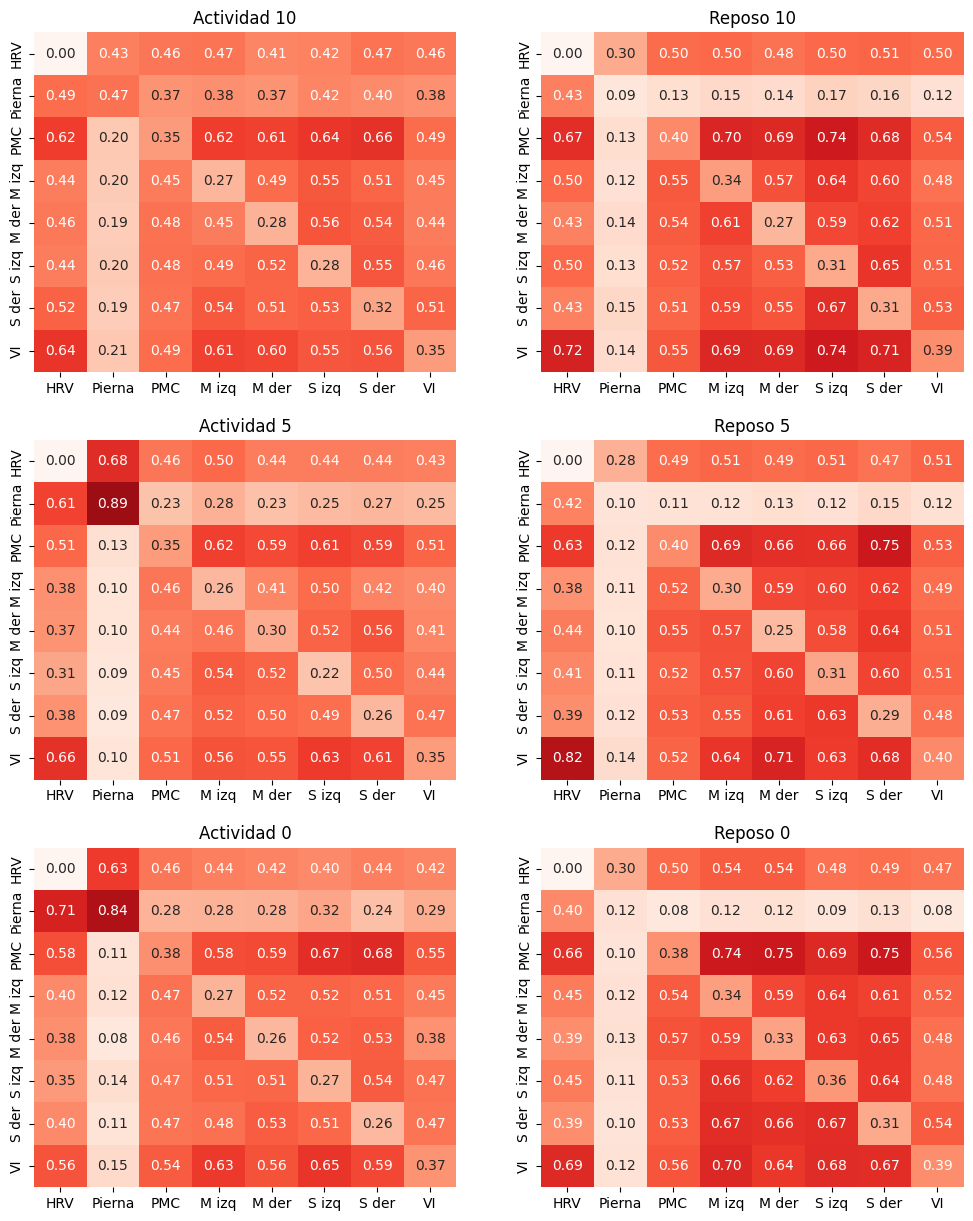

In [17]:
thresh = 0
maxi = 1

plt.figure(figsize=(12, 15))
plt.subplot(3, 2, 1)

mat = act_10
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
sns.heatmap(matriz_supernodos, cmap='Reds', annot=True, cbar=False, xticklabels=groups.keys(), yticklabels=groups.keys(), vmax=maxi, vmin=0, fmt=".2f")

plt.title(f'Actividad 10')

plt.subplot(3, 2, 2)
mat = rep_10
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
sns.heatmap(matriz_supernodos, cmap='Reds', annot=True, cbar=False, xticklabels=groups.keys(), yticklabels=groups.keys(), vmax=maxi, vmin=0, fmt=".2f")
plt.title(f'Reposo 10')

plt.subplot(3, 2, 3)
mat = act_5
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
sns.heatmap(matriz_supernodos, cmap='Reds', annot=True, cbar=False, xticklabels=groups.keys(), yticklabels=groups.keys(), vmax=maxi, vmin=0, fmt=".2f")
plt.title(f'Actividad 5')

plt.subplot(3, 2, 4)
mat = rep_5
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
sns.heatmap(matriz_supernodos, cmap='Reds', annot=True, cbar=False, xticklabels=groups.keys(), yticklabels=groups.keys(), vmax=maxi, vmin=0, fmt=".2f")
plt.title(f'Reposo 5')

plt.subplot(3, 2, 5)
mat = act_0
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
sns.heatmap(matriz_supernodos, cmap='Reds', annot=True, cbar=False, xticklabels=groups.keys(), yticklabels=groups.keys(), vmax=maxi, vmin=0, fmt=".2f")
plt.title(f'Actividad 0')

plt.subplot(3, 2, 6)
mat = rep_0
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
sns.heatmap(matriz_supernodos, cmap='Reds', annot=True, cbar=False, xticklabels=groups.keys(), yticklabels=groups.keys(), vmax=maxi, vmin=0, fmt=".2f")
plt.title(f'Reposo 0')


In [18]:

# Función para generar y graficar la matriz de supernodos en subplots específicos
def plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=None, title=None, weight_factor = 5, weight_pot = 1,  edge_cmap = plt.cm.plasma, size_factor = 10, size_pot = 1):
    """
    Generar y graficar una red dirigida entre supernodos con flechas y colores diferenciados por grupo en un subplot específico.
    
    Args:
        matriz_supernodos (ndarray): Matriz de conectividad entre los supernodos.
        groups (dict): Diccionario donde las claves son los nombres de los grupos y los valores son listas de nodos.
        group_colors (dict): Diccionario con los colores para cada grupo.
        group_positions (dict): Diccionario con posiciones de los nodos.
        max (float): Valor máximo para escalar los pesos de las aristas.
        min (float): Valor mínimo para escalar los pesos de las aristas.
        ax (matplotlib.axes.Axes): Subplot específico para graficar la red.
    """
    # Escalar la matriz de conectividad entre min y max
    matriz_supernodos = (matriz_supernodos - np.min(matriz_supernodos)) / (np.max(matriz_supernodos) - np.min(matriz_supernodos))
    matriz_supernodos = matriz_supernodos * (max - min) + min

    # Crear un grafo dirigido
    G = nx.DiGraph()

    # Agregar los nodos correspondientes a los supernodos
    for group_name in groups.keys():
        G.add_node(group_name)

    # Crear las aristas entre los supernodos con sus respectivos pesos
    for i, group_i in enumerate(groups.keys()):
        for j, group_j in enumerate(groups.keys()):
            if matriz_supernodos[i, j] > 0:
                G.add_edge(group_i, group_j, weight=matriz_supernodos[i, j])

    # Si no se proporciona un objeto `ax`, usar el actual
    if ax is None:
        ax = plt.gca()

    # Configurar el subplot
    if title is not None:
        ax.set_title(title)
    
    ax.axis("off")

    # Colores para los nodos según el grupo
    node_colors = [group_colors[group] for group in G.nodes()]
    
    # Tamaño de los nodos basado en la cantidad de conexiones (grado)
    node_sizes = [size_factor * G.degree(group) ** size_pot for group in G.nodes()]
    
    # Dibujar nodos con colores según el grupo
    nx.draw_networkx_nodes(
        G,
        group_positions,
        ax=ax,
        node_size=node_sizes,
        node_color=node_colors,
        alpha=0.7
    )

    # Dibujar las aristas con color y grosor según el peso
    edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
    edge_widths = [weight * weight_factor**weight_pot for weight in edge_weights]  # Ajustar el grosor según el peso

    nx.draw_networkx_edges(
        G,
        group_positions,
        ax=ax,
        width=edge_widths,
        edge_color=edge_weights,
        #edge_cmap=plt.cm.Reds,  # Colormap para las aristas
        edge_cmap=edge_cmap,
        arrows=True,
        arrowsize=20,
        alpha=0.7
    )

    # Dibujar las etiquetas de los nodos
    nx.draw_networkx_labels(
        G,
        group_positions,
        ax=ax,
        font_size=10,
        font_weight="bold"
    )



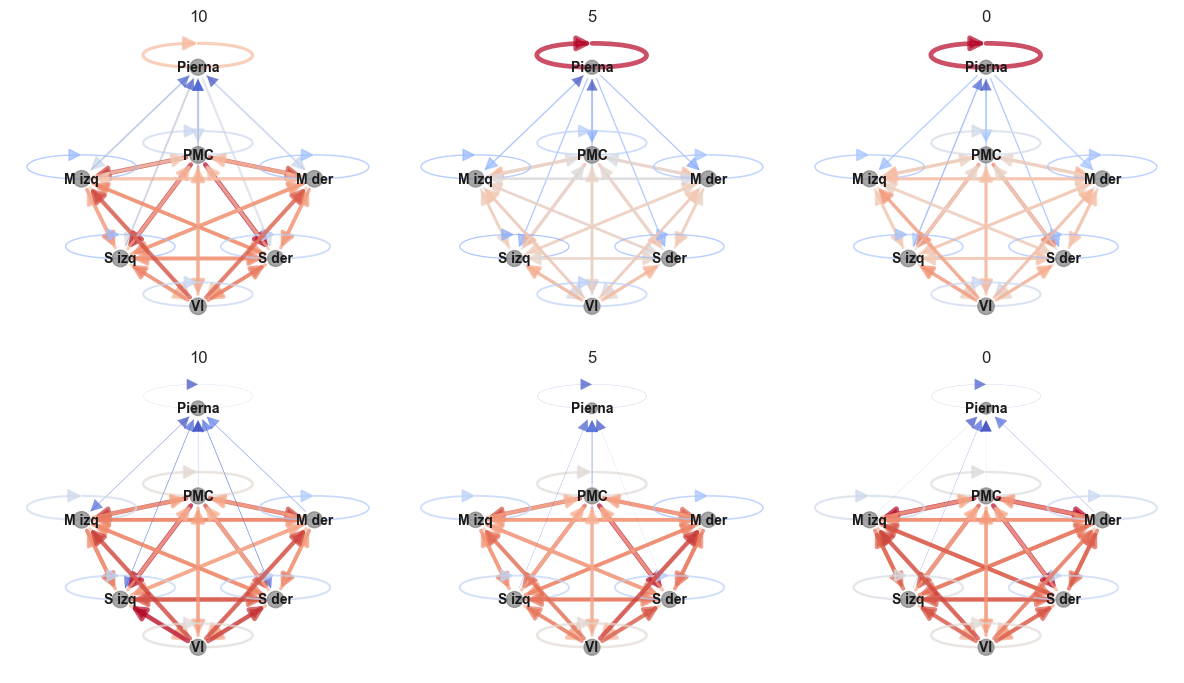

In [19]:
# Ejemplo de uso:
sns.set(style='white')


# Diccionario de grupos
groups = {
    "Pierna": [2, 3, 4],
    "PMC": [5, 6, 7],
    "M izq": [9, 10],
    "M der": [12, 13],
    "S izq": [8, 15],
    "S der": [14, 17],
    "VI": [18, 19, 20]
}

# Colores para cada grupo
group_colors = {
    "Pierna": "Grey",
    "PMC": "Grey",
    "M izq": "Grey",
    "M der": "Grey",
    "S izq": "Grey",
    "S der": "Grey",
    "VI": "Grey"
}

group_positions = {
    "Pierna": (0, 10),    # 'Pierna' más centrado pero aún en la parte superior
    "PMC": (0, 4.5),        # 'PMC' un poco más cerca de 'Pierna'
    "M izq": (-1.2, 3),     # 'M izq' alineado horizontalmente y más cerca del centro
    "M der": (1.2, 3),      # 'M der' simétrico a 'M izq'
    "S izq": (-0.8, -2),    # 'S izq' más bajo pero alineado con 'M izq'
    "S der": (0.8, -2),     # 'S der' simétrico a 'S izq'
    "VI": (0, -5)         # 'VI' centrado al final para cerrar la jerarquía
}



fig, axes = plt.subplots(2, 3, figsize=(12, 7))
weight_factor = 1.5
weight_pot = 3


thresh = 0.13
mat = act_10
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[0, 0], title='10', weight_factor=weight_factor , weight_pot=weight_pot,edge_cmap=plt.cm.coolwarm)
#thresh = 0.5
mat = act_5
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[0, 1], title='5', weight_factor=weight_factor, weight_pot=weight_pot, edge_cmap=plt.cm.coolwarm)
mat = act_0
#thresh = 0.5
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[0, 2], title='0', weight_factor=weight_factor, weight_pot=weight_pot, edge_cmap=plt.cm.coolwarm)


mat = rep_10
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[1, 0], title='10', weight_factor=weight_factor, weight_pot=weight_pot, edge_cmap=plt.cm.coolwarm)
#thresh = 0.5
mat = rep_5
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[1, 1], title='5', weight_factor=weight_factor, weight_pot=weight_pot, edge_cmap=plt.cm.coolwarm)
mat = rep_0
#thresh = 0.5
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[1, 2], title='0', weight_factor=weight_factor, weight_pot=weight_pot,edge_cmap=plt.cm.coolwarm)


plt.tight_layout()
plt.show()

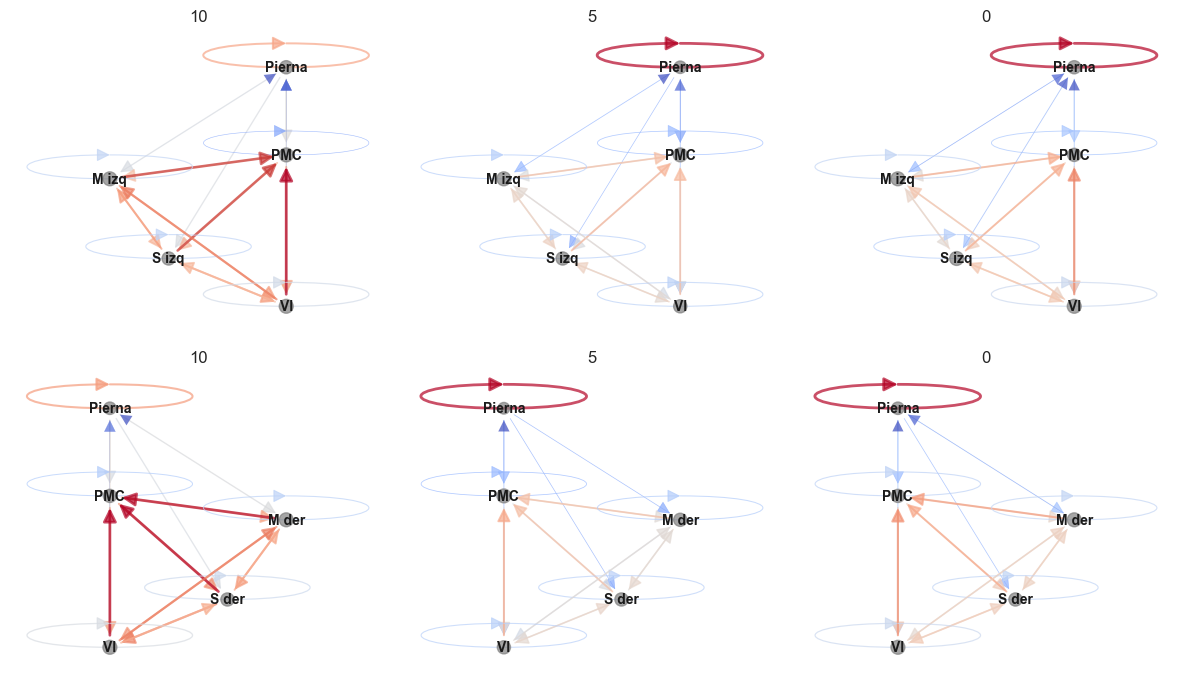

In [20]:

groups = {
    "Pierna": [2, 3, 4],
    "PMC": [5, 6],
    "M izq": [9, 10, 11],
    "S izq": [8, 15, 16],
    "VI": [18, 19, 20]
}

# Colores para cada grupo
group_colors = {
    "Pierna": "Grey",
    "PMC": "Grey",
    "M izq": "Grey",
    "S izq": "Grey",    
    "VI": "Grey"
}

group_positions = {
    "Pierna": (0, 10),    # 'Pierna' más centrado pero aún en la parte superior
    "PMC": (0, 4.5),        # 'PMC' un poco más cerca de 'Pierna'
    "M izq": (-1.2, 3),     # 'M izq' alineado horizontalmente y más cerca del centro
    #"M der": (1.2, 3),      # 'M der' simétrico a 'M izq'
    "S izq": (-0.8, -2),    # 'S izq' más bajo pero alineado con 'M izq'
    #"S der": (0.8, -2),     # 'S der' simétrico a 'S izq'
    "VI": (0, -5)         # 'VI' centrado al final para cerrar la jerarquía
}



fig, axes = plt.subplots(2, 3, figsize=(12, 7))
weight_factor = 2
weight_pot = 1
thresh = 0.13

mat = act_10
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[0, 0], title='10', weight_factor=weight_factor, weight_pot=weight_pot, edge_cmap=plt.cm.coolwarm)
#thresh = 0.5
mat = act_5
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[0, 1], title='5', weight_factor=weight_factor, weight_pot=weight_pot,edge_cmap=plt.cm.coolwarm)
mat = act_0
#thresh = 0.5
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[0, 2], title='0', weight_factor=weight_factor, weight_pot=weight_pot, edge_cmap=plt.cm.coolwarm)

groups = {
    "Pierna": [2, 3, 4],
    "PMC": [6, 7],
    #"M izq": [9, 10, 11],
    "M der": [12, 13, 11],
    #"S izq": [8, 15],
    "S der": [14, 17, 16],
    "VI": [18, 19, 20]
}


# Colores para cada grupo
group_colors = {
    "Pierna": "Grey",
    "PMC": "Grey",
    "M der": "Grey",
    "S der": "Grey",    
    "VI": "Grey"
}

group_positions = {
    "Pierna": (0, 10),    # 'Pierna' más centrado pero aún en la parte superior
    "PMC": (0, 4.5),        # 'PMC' un poco más cerca de 'Pierna'
    #"M izq": (-1.2, 3),     # 'M izq' alineado horizontalmente y más cerca del centro
    "M der": (1.2, 3),      # 'M der' simétrico a 'M izq'
    #"S izq": (-0.8, -2),    # 'S izq' más bajo pero alineado con 'M izq'
    "S der": (0.8, -2),     # 'S der' simétrico a 'S izq'
    "VI": (0, -5)         # 'VI' centrado al final para cerrar la jerarquía
}


mat = act_10
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[1, 0], title='10', weight_factor=weight_factor, edge_cmap=plt.cm.coolwarm)
#thresh = 0.5
mat = act_5
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[1, 1], title='5', weight_factor=weight_factor, edge_cmap=plt.cm.coolwarm)
mat = act_0
#thresh = 0.5
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[1, 2], title='0', weight_factor=weight_factor, edge_cmap=plt.cm.coolwarm)



plt.tight_layout()
plt.show()

In [520]:
groups = {
    "RL": [2, 3, 4],
    "CC": [6, 11, 16],
    "CL": [5, 9, 10, 8],
    "CR": [13, 7, 12, 14],
    "PL": [8, 15],
    "PR": [14, 17],
    "O": [18, 19, 20]
}


for group in groups.keys():
    print(f"{group}: {', '.join([ch_names[i] for i in groups[group]])}")

RL: EnvAnta, EnvAgo, Posicion
CC: FCz, Cz, Pz
CL: FC3, C3, C1, CP3
CR: C4, FC4, C2, CP4
PL: CP3, P3
PR: CP4, P4
O: O1, Oz, O2


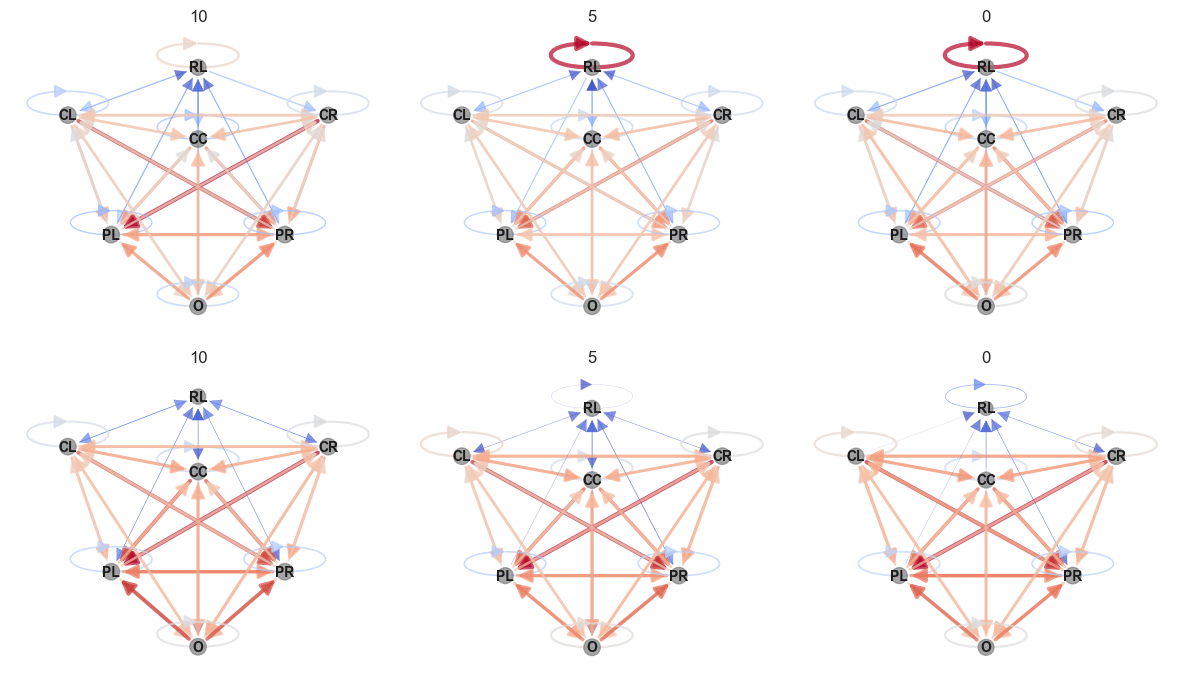

In [521]:
# Ejemplo de uso:
sns.set(style='white')


group_colors = {
    "RL": "Grey",
    "CC": "Grey",
    "CL": "Grey",
    "CR": "Grey",
    "PL": "Grey",
    "PR": "Grey",
    "O": "Grey"
}

group_positions = {
    "RL": (0, 5),    
    "CC": (0,  2),       
    "CL": (-1.2, 3),     
    "CR": (1.2, 3),      
    "PL": (-0.8, -2),   
    "PR": (0.8, -2),    
    "O": (0, -5)         
}



fig, axes = plt.subplots(2, 3, figsize=(12, 7))
weight_factor = 3
thresh = 0.13
cmap = plt.cm.coolwarm

mat = act_10
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[0, 0], title='10', weight_factor=weight_factor, edge_cmap=cmap)
#thresh = 0.5
mat = act_5
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[0, 1], title='5', weight_factor=weight_factor, edge_cmap=cmap)
mat = act_0
#thresh = 0.5
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[0, 2], title='0', weight_factor=weight_factor, edge_cmap=cmap)


mat = rep_10
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[1, 0], title='10', weight_factor=weight_factor, edge_cmap=cmap)
#thresh = 0.5
mat = rep_5
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[1, 1], title='5', weight_factor=weight_factor, edge_cmap=cmap)
mat = rep_0
#thresh = 0.5
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[1, 2], title='0', weight_factor=weight_factor, edge_cmap=cmap)


plt.tight_layout()
plt.show()

# Compración entre las bandas

In [522]:
maxi = np.shape(Carga_10)[0]

mu_act_10, mu_rep_10 = get_sum_matriz(Carga_10,"mu", option="mean")
mu_act_5, mu_rep_5 = get_sum_matriz(Carga_5, "mu", option="mean") 
mu_act_0, mu_rep_0 = get_sum_matriz(Carga_0, "mu", option="mean") 

beta_act_10, beta_rep_10 = get_sum_matriz(Carga_10, 'beta', option="mean") 
beta_act_5, beta_rep_5 = get_sum_matriz(Carga_5, 'beta', option="mean") 
beta_act_0, beta_rep_0 = get_sum_matriz(Carga_0, 'beta', option="mean") 

gamma_act_10, gamma_rep_10 = get_sum_matriz(Carga_10, 'gamma', option="mean")
gamma_act_5, gamma_rep_5 = get_sum_matriz(Carga_5, 'gamma', option="mean") 
gamma_act_0, gamma_rep_0 = get_sum_matriz(Carga_0, 'gamma', option="mean") 

### Opcion 1 de visualización

EEG connectivity in functional brain networks 
supporting visuomotor integration processes in 
dominant and non-dominant hand movements  
A. Calcagno, S. Coelli, M. Corda, F. Temporiti, R. Gatti, M. Galli and A.M. Bianchi 

In [523]:
# siguiento a A. Calcagno,
groups = {
    "HRV": [0],
    "RL": [2, 3, 4],
    "CC": [6, 11, 16],
    "CL": [5, 9, 10, 8],
    "CR": [13, 7, 12, 14],
    "PL": [15, 8],
    "PR": [17, 14],
    "O": [18, 19, 20]
}

for group in groups.keys():
    print(f"{group}: {', '.join([ch_names[i] for i in groups[group]])}")



HRV: HRV
RL: EnvAnta, EnvAgo, Posicion
CC: FCz, Cz, Pz
CL: FC3, C3, C1, CP3
CR: C4, FC4, C2, CP4
PL: P3, CP3
PR: P4, CP4
O: O1, Oz, O2


In [524]:
from matplotlib.colors import LinearSegmentedColormap


C:\Users\fercy\AppData\Local\Temp\ipykernel_12004\3790452498.py:101: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


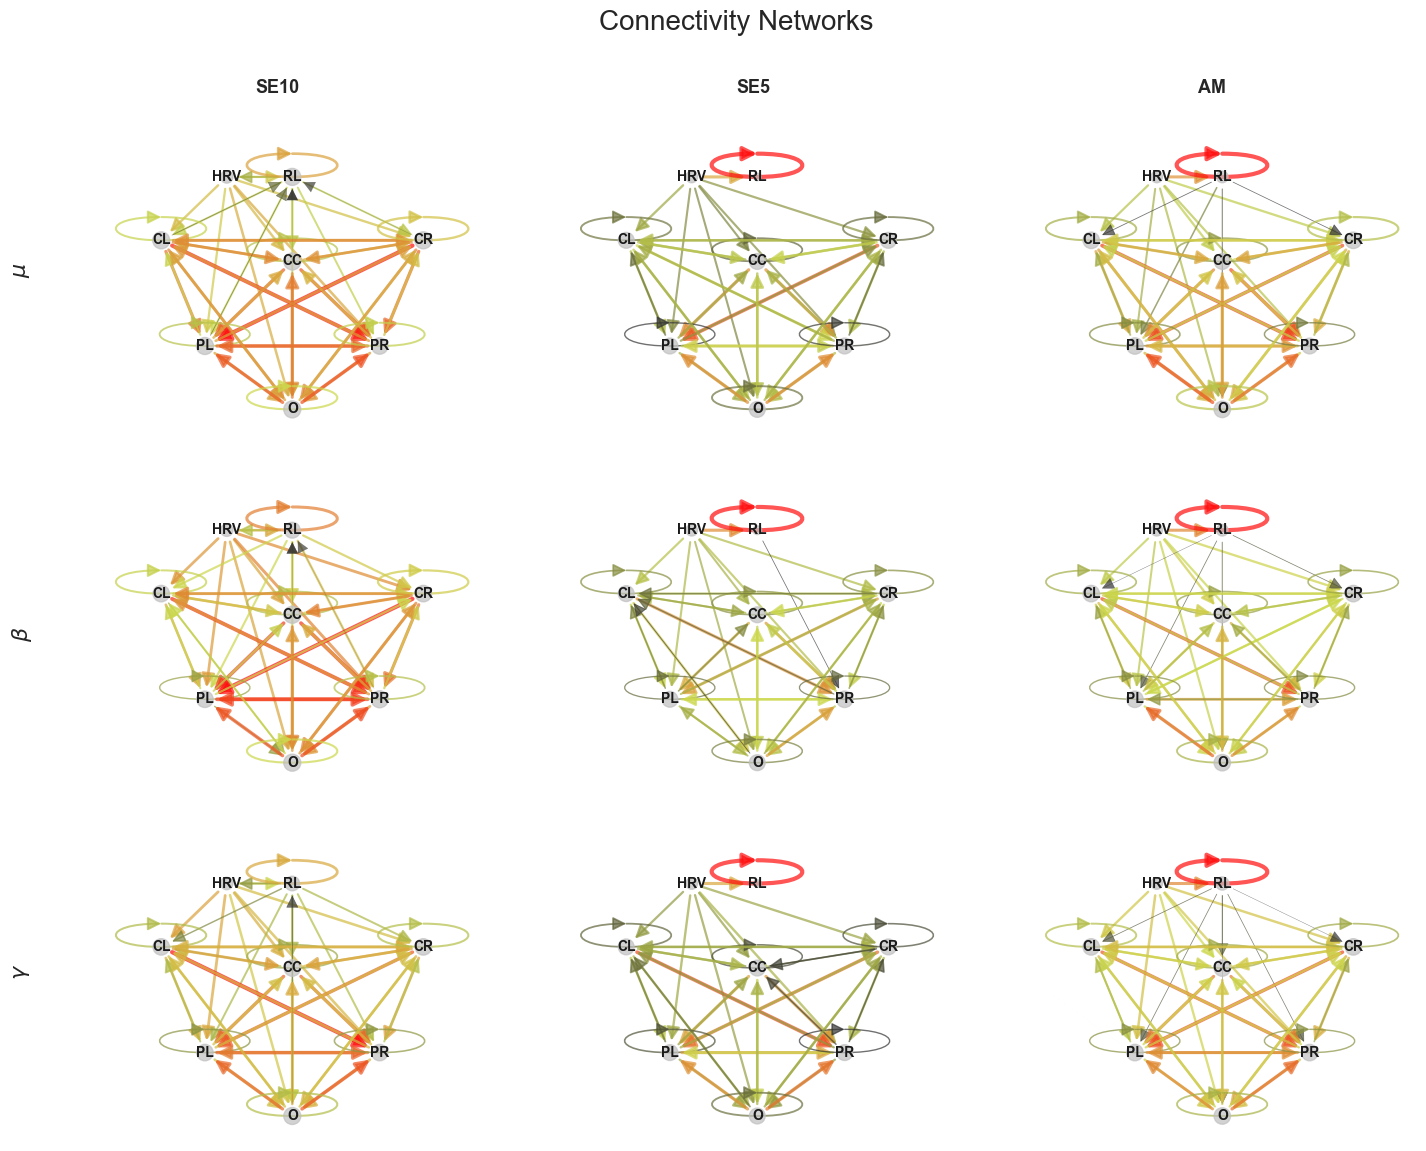

In [525]:
# Ejemplo de uso:
sns.set(style='white')


group_colors = {
    "HRV": "silver",
    "RL": "silver",
    "CC": "silver",
    "CL": "silver",
    "CR": "silver",
    "PL": "silver",
    "PR": "silver",
    "O": "silver"
}

group_positions = {
    "HRV": (-0.6, 6),
    "RL": (0, 6),    
    "CC": (0,  2),       
    "CL": (-1.2, 3),     
    "CR": (1.2, 3),      
    "PL": (-0.8, -2),   
    "PR": (0.8, -2),    
    "O": (0, -5)         
}



fig, axes = plt.subplots(3, 3, figsize=(17, 13))


plt.suptitle(fr'Connectivity Networks', fontsize=20)

plt.text(0.23, 0.92, 'SE10', ha='center', va='center', transform=plt.gcf().transFigure, fontsize=13, weight='bold')
plt.text(0.51, 0.92, 'SE5', ha='center', va='center', transform=plt.gcf().transFigure, fontsize=13, weight='bold')
plt.text(0.78, 0.92, 'AM', ha='center', va='center', transform=plt.gcf().transFigure, fontsize=13, weight='bold')

plt.text(0.08, 0.78, r'$\mu$', ha='center', va='center', transform=plt.gcf().transFigure, fontsize=16, rotation='vertical', weight='bold')
plt.text(0.08, 0.50, r'$\beta$', ha='center', va='center', transform=plt.gcf().transFigure, fontsize=16, rotation='vertical', weight='bold')
plt.text(0.08, 0.24, r'$\gamma$', ha='center', va='center', transform=plt.gcf().transFigure, fontsize=16, rotation='vertical', weight='bold')


plt.axis('off')

weight_factor = 3
size_factor = 10
size_pot = 1
thresh = 0.30
cmap = plt.cm.coolwarm
#cmap = plt.cm.seismic

colors = [(0.2, 0.2, 0.2), (0.8, 0.85, 0.3), (1, 0.05, 0.05)] 
n_bins = 200 
cmap_name = 'custom_cmap'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
cmap = custom_cmap

# ***************** Mu *****************
mat = mu_act_10
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[0, 0], weight_factor=weight_factor, edge_cmap=cmap, size_factor=size_factor, size_pot=size_pot)

mat = mu_act_5
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[0, 1], weight_factor=weight_factor, edge_cmap=cmap, size_factor=size_factor, size_pot=size_pot)

mat = mu_act_0
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[0, 2], weight_factor=weight_factor, edge_cmap=cmap, size_factor=size_factor, size_pot=size_pot)
# ***************** Mu *****************

# ***************** Beta *****************
mat = beta_act_10
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[1, 0], weight_factor=weight_factor, edge_cmap=cmap, size_factor=size_factor, size_pot=size_pot)

mat = beta_act_5
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[1, 1], weight_factor=weight_factor, edge_cmap=cmap, size_factor=size_factor, size_pot=size_pot)
mat = beta_act_0

matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[1, 2], weight_factor=weight_factor, edge_cmap=cmap, size_factor=size_factor, size_pot=size_pot)
# ***************** Beta *****************

# ***************** Gamma *****************
mat = gamma_act_10
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[2, 0], weight_factor=weight_factor, edge_cmap=cmap, size_factor=size_factor, size_pot=size_pot)

mat = gamma_act_5
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[2, 1], weight_factor=weight_factor, edge_cmap=cmap, size_factor=size_factor, size_pot=size_pot)
mat = gamma_act_0

matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[2, 2], weight_factor=weight_factor, edge_cmap=cmap, size_factor=size_factor, size_pot=size_pot)
# ***************** Gamma *****************


plt.tight_layout()
plt.show()

### Opción 2 de visualización

In [526]:
# Diccionario de grupos
groups = {
    "HRV": [0],
    "RL": [2, 3, 4],
    "SMC": [5, 6, 7],
    "ML": [9, 10],
    "MR": [12, 13],
    "SL": [8, 15],
    "SR": [14, 17],
    "VC": [18, 19, 20]
}

for group in groups.keys():
    print(f"{group}: {', '.join([ch_names[i] for i in groups[group]])}")

HRV: HRV
RL: EnvAnta, EnvAgo, Posicion
SMC: FC3, FCz, FC4
ML: C3, C1
MR: C2, C4
SL: CP3, P3
SR: CP4, P4
VC: O1, Oz, O2


C:\Users\fercy\AppData\Local\Temp\ipykernel_12004\1172898435.py:95: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


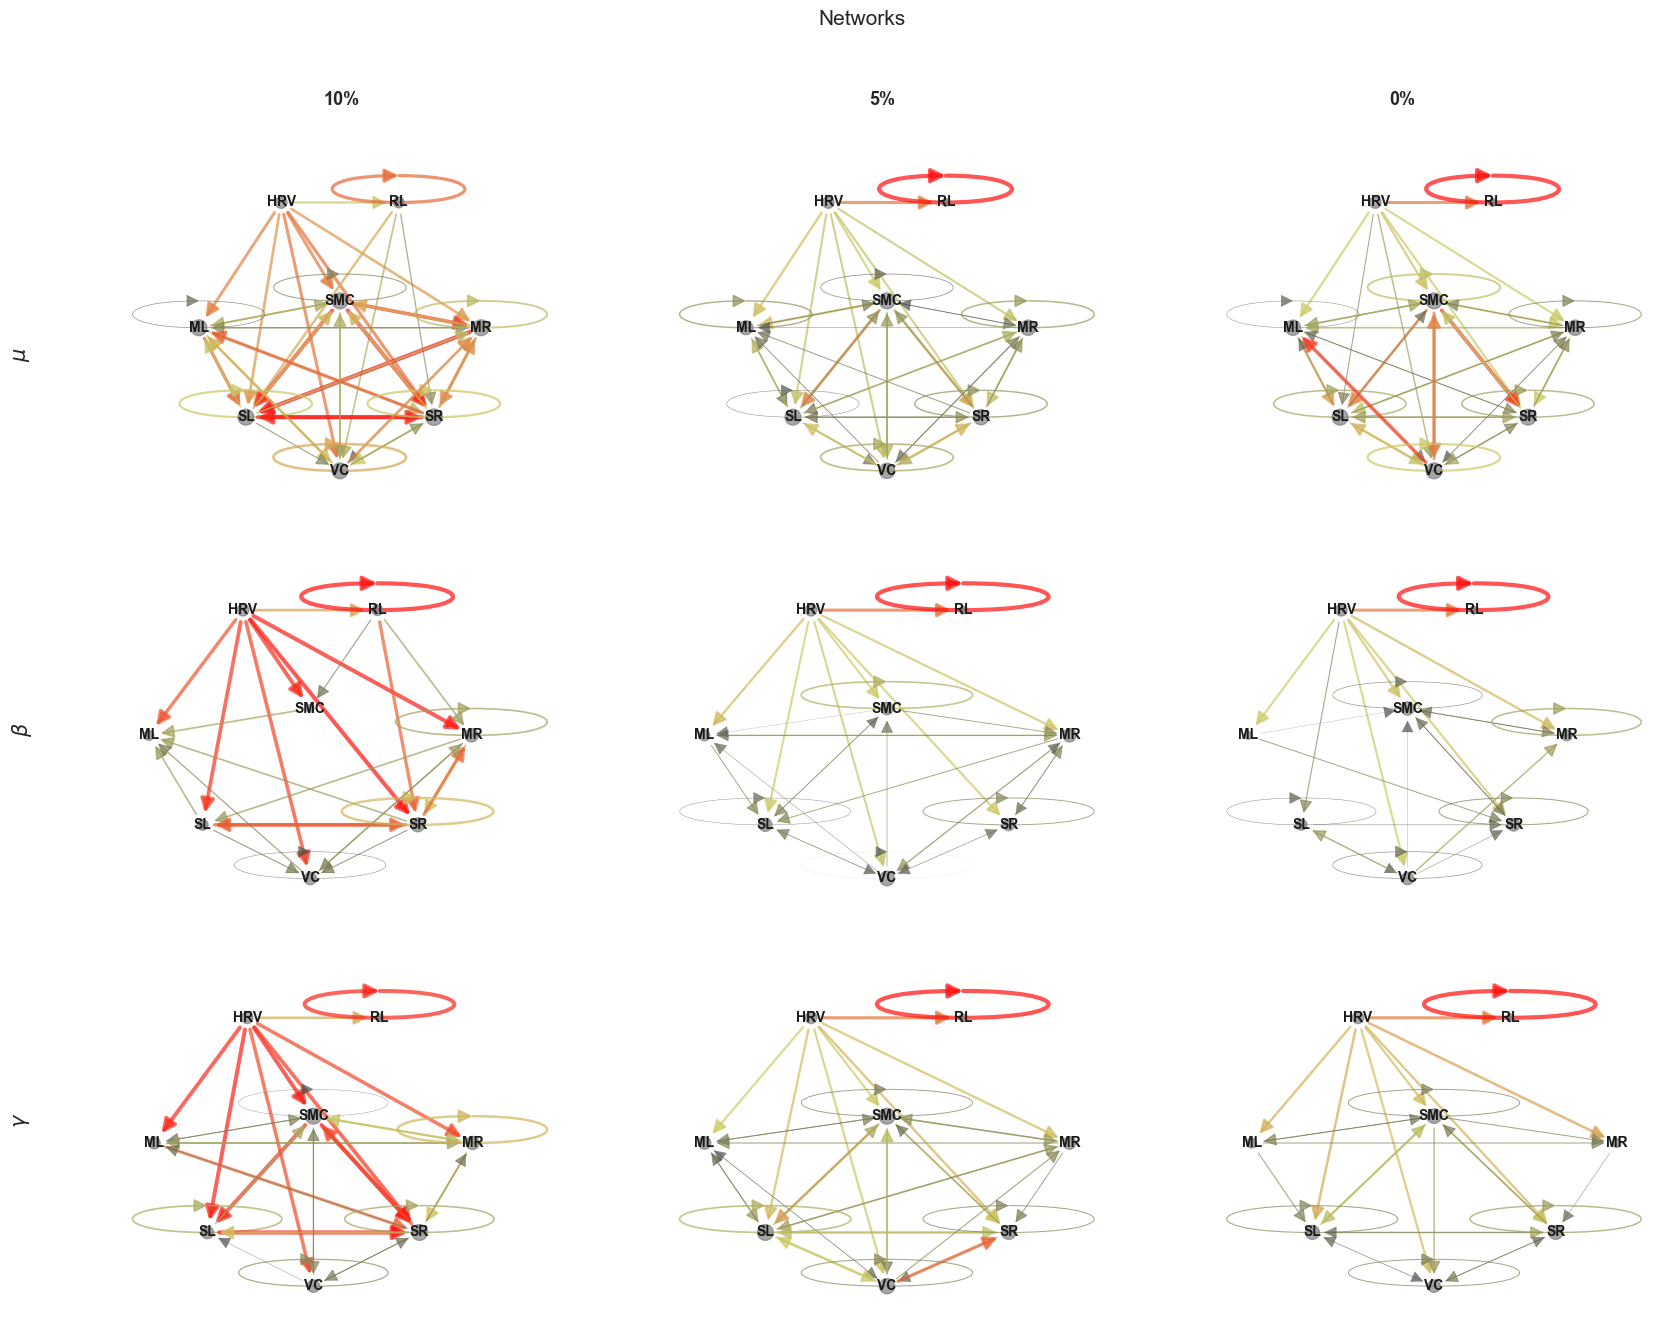

In [527]:

group_colors = {
    "HRV": "Grey",
    "RL": "Grey",
    "SMC": "Grey",
    "ML": "Grey",
    "MR": "Grey",
    "SL": "Grey",
    "SR": "Grey",
    "VC": "Grey"
}

group_positions = {
    "HRV": (-0.5, 10),
    "RL": (0.5, 10),   
    "SMC": (0, 4.5),        
    "ML": (-1.2, 3),    
    "MR": (1.2, 3),    
    "SL": (-0.8, -2),   
    "SR": (0.8, -2),     
    "VC": (0, -5)        
}



fig, axes = plt.subplots(3, 3, figsize=(20, 15))


plt.suptitle(fr'Networks', fontsize=15)

plt.text(0.24, 0.92, '10%', ha='center', va='center', transform=plt.gcf().transFigure, fontsize=13, weight='bold')
plt.text(0.51, 0.92, '5%', ha='center', va='center', transform=plt.gcf().transFigure, fontsize=13, weight='bold')
plt.text(0.77, 0.92, '0%', ha='center', va='center', transform=plt.gcf().transFigure, fontsize=13, weight='bold')

plt.text(0.08, 0.75, r'$\mu$', ha='center', va='center', transform=plt.gcf().transFigure, fontsize=15, rotation='vertical', weight='bold')
plt.text(0.08, 0.50, r'$\beta$', ha='center', va='center', transform=plt.gcf().transFigure, fontsize=15, rotation='vertical', weight='bold')
plt.text(0.08, 0.24, r'$\gamma$', ha='center', va='center', transform=plt.gcf().transFigure, fontsize=15, rotation='vertical', weight='bold')


plt.axis('off')

weight_factor = 3
thresh = 0.40
cmap = plt.cm.coolwarm
#cmap = plt.cm.seismic

colors = [(0.3, 0.3, 0.3), (0.8, 0.8, 0.4), (1, 0.05, 0.05)] 
n_bins = 200 
cmap_name = 'custom_cmap'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
cmap = custom_cmap

# ***************** Mu *****************
mat = mu_act_10
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[0, 0], weight_factor=weight_factor, edge_cmap=cmap)

mat = mu_act_5
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[0, 1], weight_factor=weight_factor, edge_cmap=cmap)

mat = mu_act_0
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[0, 2], weight_factor=weight_factor, edge_cmap=cmap)
# ***************** Mu *****************

# ***************** Beta *****************
mat = beta_act_10
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[1, 0], weight_factor=weight_factor, edge_cmap=cmap)

mat = beta_act_5
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[1, 1], weight_factor=weight_factor, edge_cmap=cmap)
mat = beta_act_0

matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[1, 2], weight_factor=weight_factor, edge_cmap=cmap)
# ***************** Beta *****************

# ***************** Gamma *****************
mat = gamma_act_10
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[2, 0], weight_factor=weight_factor, edge_cmap=cmap)

mat = gamma_act_5
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[2, 1], weight_factor=weight_factor, edge_cmap=cmap)
mat = gamma_act_0

matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[2, 2], weight_factor=weight_factor, edge_cmap=cmap)
# ***************** Gamma *****************


plt.tight_layout()
plt.show()

### Opcion 3

In [528]:
groups = {
    "HRV": [0],
    "RL": [2, 3, 4],
    "SMC": [5, 6],
    "ML": [9, 10, 11],
    "SL": [8, 15, 16],
    "VC": [18, 19, 20]
}

for group in groups.keys():
    print(f"{group}: {', '.join([ch_names[i] for i in groups[group]])}")

HRV: HRV
RL: EnvAnta, EnvAgo, Posicion
SMC: FC3, FCz
ML: C3, C1, Cz
SL: CP3, P3, Pz
VC: O1, Oz, O2


In [529]:


# Colores para cada grupo
group_colors = {
    "HRV": "Grey",
    "RL": "Grey",
    "SMC": "Grey",
    "ML": "Grey",
    "SL": "Grey",    
    "VC": "Grey"
}

group_positions = {
    "HRV": (-0.6, 8.5),    
    "RL": (0.5, 8.5),    
    "SMC": (0, 4.8),     
    "ML": (-1.2, 3.2),  
    "SL": (-0.7, -2.5),   
    "VC": (0, -5.2)    
}



C:\Users\fercy\AppData\Local\Temp\ipykernel_12004\854383281.py:73: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


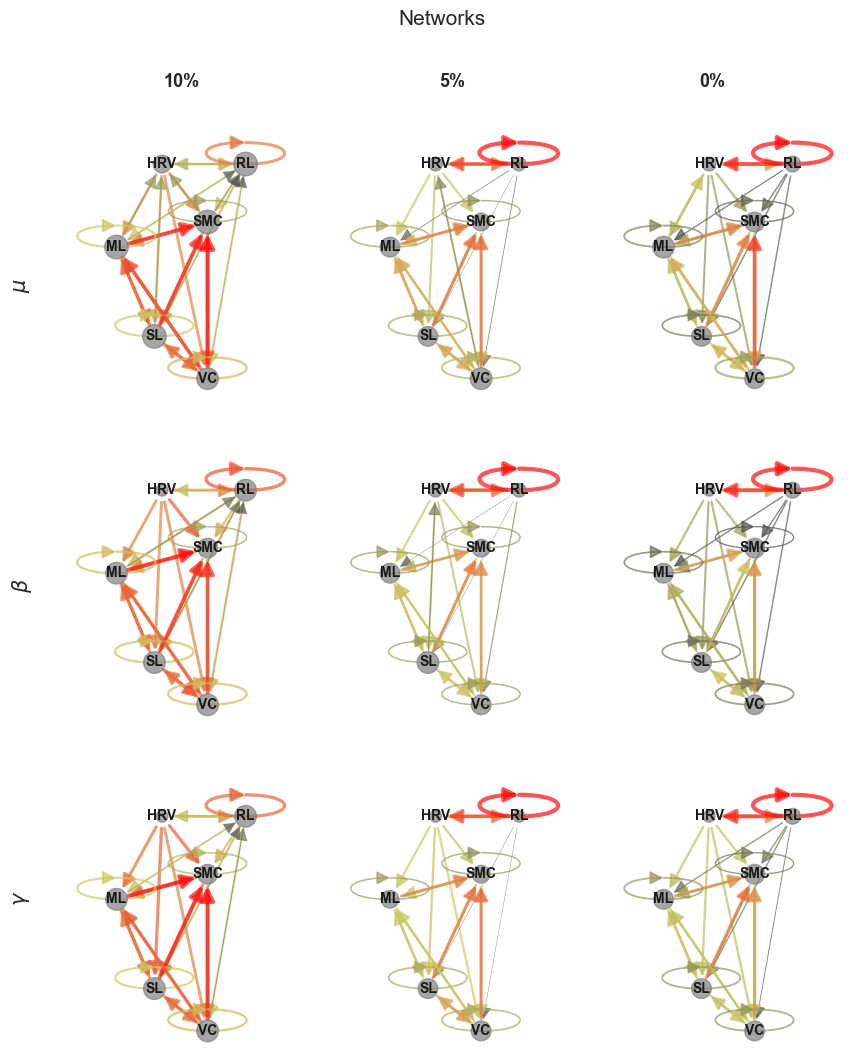

In [530]:
fig, axes = plt.subplots(3, 3, figsize=(10, 12))


plt.suptitle(fr'Networks', fontsize=15)

plt.text(0.24, 0.92, '10%', ha='center', va='center', transform=plt.gcf().transFigure, fontsize=13, weight='bold')
plt.text(0.51, 0.92, '5%', ha='center', va='center', transform=plt.gcf().transFigure, fontsize=13, weight='bold')
plt.text(0.77, 0.92, '0%', ha='center', va='center', transform=plt.gcf().transFigure, fontsize=13, weight='bold')

plt.text(0.08, 0.75, r'$\mu$', ha='center', va='center', transform=plt.gcf().transFigure, fontsize=15, rotation='vertical', weight='bold')
plt.text(0.08, 0.50, r'$\beta$', ha='center', va='center', transform=plt.gcf().transFigure, fontsize=15, rotation='vertical', weight='bold')
plt.text(0.08, 0.24, r'$\gamma$', ha='center', va='center', transform=plt.gcf().transFigure, fontsize=15, rotation='vertical', weight='bold')


plt.axis('off')

weight_factor = 3
size_factor = 2
size_pot = 2
thresh = 0.25
cmap = plt.cm.coolwarm
#cmap = plt.cm.seismic

colors = [(0.3, 0.3, 0.3), (0.8, 0.8, 0.4), (1, 0.05, 0.05)] 
n_bins = 200 
cmap_name = 'custom_cmap'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
cmap = custom_cmap

# ***************** Mu *****************
mat = mu_act_10
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[0, 0], weight_factor=weight_factor, edge_cmap=cmap, size_factor=size_factor, size_pot=size_pot)

mat = mu_act_5
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[0, 1], weight_factor=weight_factor, edge_cmap=cmap, size_factor=size_factor, size_pot=size_pot)

mat = mu_act_0
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[0, 2], weight_factor=weight_factor, edge_cmap=cmap, size_factor=size_factor, size_pot=size_pot)
# ***************** Mu *****************

# ***************** Beta *****************
mat = beta_act_10
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[1, 0], weight_factor=weight_factor, edge_cmap=cmap, size_factor=size_factor, size_pot=size_pot)

mat = beta_act_5
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[1, 1], weight_factor=weight_factor, edge_cmap=cmap, size_factor=size_factor, size_pot=size_pot)
mat = beta_act_0

matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[1, 2], weight_factor=weight_factor, edge_cmap=cmap, size_factor=size_factor, size_pot=size_pot)
# ***************** Beta *****************

# ***************** Gamma *****************
mat = gamma_act_10
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[2, 0], weight_factor=weight_factor, edge_cmap=cmap, size_factor=size_factor, size_pot=size_pot)

mat = gamma_act_5
matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[2, 1], weight_factor=weight_factor, edge_cmap=cmap, size_factor=size_factor, size_pot=size_pot)
mat = gamma_act_0

matriz_supernodos = generar_matriz_supernodos((mat > thresh).astype(int) * mat, groups)
plot_grouped_network(matriz_supernodos, groups, group_colors, group_positions, max=1, min=0, ax=axes[2, 2], weight_factor=weight_factor, edge_cmap=cmap, size_factor=size_factor, size_pot=size_pot)
# ***************** Gamma *****************


plt.tight_layout()
plt.show()

# Significant diferences

In [ ]:
from statstools import *

### Banda!

 Effects of Motor Imagery Tasks on Brain Functional Networks
 Based on EEGMu/Beta Rhythm

 Exploring high-density corticomuscular 
networks after stroke to enable a hybrid 
Brain-Computer Interface for hand motor 
rehabilitation

In [554]:
### Opcion 1

groups = {
    "HRV": [0],
    "RL": [2, 3, 4],
    "CC": [6, 11, 16],
    "CL": [5, 9, 10],
    "CR": [13, 7, 12],
    "PL": [15, 8],
    "PR": [17, 14],
    "O": [18, 19, 20]

}

for group in groups.keys():
    print(f"{group}: {', '.join([ch_names[i] for i in groups[group]])}")

HRV: HRV
RL: EnvAnta, EnvAgo, Posicion
CC: FCz, Cz, Pz
CL: FC3, C3, C1
CR: C4, FC4, C2
PL: P3, CP3
PR: P4, CP4
O: O1, Oz, O2


In [535]:
### Opcion 2

groups = {
    "HRV": [0, 1],
    "RL": [2, 3, 4],
    "SMC": [5, 6, 7],
    "ML": [9, 10],
    "MR": [12, 13],
    "SL": [8, 15],
    "SR": [14, 17],
    "VC": [18, 19, 20]
}

for group in groups.keys():
    print(f"{group}: {', '.join([ch_names[i] for i in groups[group]])}")

HRV: HRV, RRV
RL: EnvAnta, EnvAgo, Posicion
SMC: FC3, FCz, FC4
ML: C3, C1
MR: C2, C4
SL: CP3, P3
SR: CP4, P4
VC: O1, Oz, O2


In [536]:
### Opcion 3

groups = {
    "HRV": [0, 1],
    "RL": [2, 3, 4],
    "SMC": [5, 6],
    "ML": [9, 10, 11],
    "SL": [8, 15, 16],
    "VC": [18, 19, 20]
}




In [563]:
nombres = []

for group in groups.keys():
    nombres.append(group)
    print(f"{group}: {', '.join([ch_names[i] for i in groups[group]])}")

nombres = np.array(nombres)

HRV: HRV
RL: EnvAnta, EnvAgo, Posicion
CC: FCz, Cz, Pz
CL: FC3, C3, C1
CR: C4, FC4, C2
PL: P3, CP3
PR: P4, CP4
O: O1, Oz, O2


In [645]:
band = "beta"

In [646]:
acts_10_varios, _ = get_sum_matriz(Carga_10, band)
acts_10_varios = np.array(acts_10_varios)

acts_5_varios, _ = get_sum_matriz(Carga_5, band)
acts_5_varios = np.array(acts_5_varios)

acts_0_varios, _ = get_sum_matriz(Carga_0, band)
acts_0_varios = np.array(acts_0_varios)

In [647]:
def genera_df(Carga, band, nombres, label = "10"):
    acts_varios, _ = get_sum_matriz(Carga, band, option=None)
    acts_varios = np.array(acts_varios)
    label = [label] * acts_varios.shape[0]
    column_names = []
    for nombre in nombres:
        for nombre2 in nombres:
            column_names.append(f"{nombre} -> {nombre2}")

    column_names = np.array(column_names)

    arr = []
    for test_mat in acts_varios:
        test_mat = np.array(test_mat)
        super_nodos = generar_matriz_supernodos(test_mat, groups)
        super_nodos = super_nodos.flatten()
        super_nodos = np.array(super_nodos)
        arr.append(super_nodos)
    arr = np.array(arr)
    df = pd.DataFrame(arr, columns=column_names)
    df["label"] = label
    return df

In [648]:
def global_efficiency(matrix):
    """
    Calcula la eficiencia global de una matriz de conectividad.

    Parameters:
    matrix (np.ndarray): La matriz de conectividad.

    Returns:
    float: La eficiencia global.
    """
    # Reemplazar ceros con np.inf para evitar división por cero
    with np.errstate(divide='ignore', invalid='ignore'):
        inv_distances = np.where(matrix != 0, 1 / matrix, 0)
    np.fill_diagonal(inv_distances, 0)
    efficiency = np.sum(inv_distances) / (matrix.shape[0] * (matrix.shape[0] - 1))
    return efficiency

In [649]:
from scipy.sparse.csgraph import shortest_path
import networkx as nx
from collections import deque

In [650]:
def get_deg(test_mat):
    temp_in_deg = np.zeros((test_mat.shape[0]))
    temp_out_deg = np.zeros((test_mat.shape[0]))
    
    for i in range(test_mat.shape[0]):
        temp_in_deg[i] = np.sum(test_mat[:, i]) / (test_mat.shape[0] - 1)
        temp_out_deg[i] = np.sum(test_mat[i, :]) / (test_mat.shape[0] - 1)
    return temp_in_deg, temp_out_deg

def global_efficiency(matrix):
    """
    Calcula la eficiencia global de una matriz de conectividad.

    Parameters:
    matrix (np.ndarray): La matriz de conectividad.

    Returns:
    float: La eficiencia global.
    """
    # Reemplazar ceros con np.inf para evitar división por cero
    with np.errstate(divide='ignore', invalid='ignore'):
        inv_distances = np.where(matrix != 0, 1 / matrix, 0)
    np.fill_diagonal(inv_distances, 0)
    efficiency = np.sum(inv_distances) / (matrix.shape[0] * (matrix.shape[0] - 1))
    return efficiency

def network_density(matrix):
    """
    Calcula la densidad de una red.

    Parameters:
    matrix (np.ndarray): La matriz de conectividad.

    Returns:
    float: La densidad de la red.
    """
    num_nodes = matrix.shape[0]
    num_possible_connections = num_nodes * (num_nodes - 1)
    num_actual_connections = np.sum(matrix != 0)
    density = num_actual_connections / num_possible_connections
    return density

def characteristic_path_length(matrix):
    """
    Calcula la longitud característica del camino de una red.

    Parameters:
    matrix (np.ndarray): La matriz de conectividad.

    Returns:
    float: La longitud característica del camino.
    """
    # Calcular las distancias más cortas entre todos los pares de nodos
    dist_matrix = shortest_path(matrix, directed=False)
    # Reemplazar los infinitos con ceros para evitar problemas en la media
    dist_matrix[dist_matrix == np.inf] = 0
    # Calcular la longitud característica del camino
    path_length = np.sum(dist_matrix) / (matrix.shape[0] * (matrix.shape[0] - 1))
    return path_length

def bfs_shortest_paths(graph, start):
    """Breadth-First Search to find all shortest paths from start node in a directed graph."""
    num_nodes = graph.shape[0]
    dist = [-1] * num_nodes
    dist[start] = 0
    paths = [[] for _ in range(num_nodes)]
    paths[start] = [[start]]
    queue = deque([start])
    
    while queue:
        current = queue.popleft()
        for neighbor in range(num_nodes):
            if graph[current, neighbor] > 0:
                if dist[neighbor] == -1:
                    dist[neighbor] = dist[current] + 1
                    queue.append(neighbor)
                if dist[neighbor] == dist[current] + 1:
                    for path in paths[current]:
                        paths[neighbor].append(path + [neighbor])
    
    return paths

def betweenness_centrality(graph):
    num_nodes = graph.shape[0]
    betweenness = np.zeros(num_nodes)
    
    for s in range(num_nodes):
        paths = bfs_shortest_paths(graph, s)
        for t in range(num_nodes):
            if s != t:
                num_paths = len(paths[t])
                if num_paths > 0:
                    node_counts = np.zeros(num_nodes)
                    for path in paths[t]:
                        for node in path[1:-1]:
                            node_counts[node] += 1
                    betweenness += node_counts / num_paths
    
    return betweenness

def generar_matriz_supernodos(matriz_conectividad, groups):
    """
    Genera una matriz de supernodos a partir de una matriz de conectividad y grupos de nodos.

    Parameters:
    matriz_conectividad (np.ndarray): La matriz de conectividad.
    groups (list): Lista de grupos de nodos.

    Returns:
    np.ndarray: La matriz de supernodos.
    """
    # Asegurarse de que matriz_conectividad sea bidimensional
    if matriz_conectividad.ndim == 1:
        raise ValueError("matriz_conectividad debe ser bidimensional")

    num_groups = len(groups)
    matriz_supernodos = np.zeros((num_groups, num_groups))

    for i, group_i in enumerate(groups):
        for j, group_j in enumerate(groups):
            total_conexion = 0
            for node_i in groups[group_i]:
                for node_j in groups[group_j]:
                    total_conexion += matriz_conectividad[node_i, node_j]
            total_conexion /= len(groups[group_j])
            matriz_supernodos[i, j] = total_conexion

    return matriz_supernodos

def genera_df(Carga, band, nombres, groups, label="10"):
    acts_varios, _ = get_sum_matriz(Carga, band, option=None)
    acts_varios = np.array(acts_varios)
    labels = [label] * acts_varios.shape[0]
    
    arrGE = []
    arrDensity = []
    arrCPL = []
    indegrees = {f'{nombres[i]}_in': [] for i in range(len(groups))}
    outdegrees = {f'{nombres[i]}_out': [] for i in range(len(groups))}
    global_degrees = {f'{nombres[i]}_global': [] for i in range(len(groups))}
    local_efficiencies = {f'{nombres[i]}_local_eff': [] for i in range(len(groups))}
    betweenness_centralities = {f'{nombres[i]}_betweenness': [] for i in range(len(groups))}
    
    for test_mat in acts_varios:
        test_mat = np.array(test_mat)
        super_nodos = generar_matriz_supernodos(test_mat, groups)
        ge = global_efficiency(super_nodos)
        density = network_density(super_nodos)
        cpl = characteristic_path_length(super_nodos)
        arrGE.append(ge)
        arrDensity.append(density)
        arrCPL.append(cpl)
        
        indeg, outdeg = get_deg(super_nodos)
        #local_eff = local_efficiency(super_nodos)
        betweenness = betweenness_centrality(super_nodos)
        
        for i in range(len(groups)):
            indegrees[f'{nombres[i]}_in'].append(indeg[i])
            outdegrees[f'{nombres[i]}_out'].append(outdeg[i])
            global_degrees[f'{nombres[i]}_global'].append(indeg[i] + outdeg[i])
            #local_efficiencies[f'{nombres[i]}_local_eff'].append(local_eff[i])
            betweenness_centralities[f'{nombres[i]}_betweenness'].append(betweenness[i])
    
    # Crear el DataFrame
    df = pd.DataFrame({
        'GlobalEfficiency': arrGE,
        'Density': arrDensity,
        'CharacteristicPathLength': arrCPL,
        'label': labels
    })
    
    # Añadir las columnas de grados de los supernodos
    for key, value in indegrees.items():
        df[key] = value
    for key, value in outdegrees.items():
        df[key] = value
    for key, value in global_degrees.items():
        df[key] = value
    #for key, value in local_efficiencies.items():
    #    df[key] = value
    for key, value in betweenness_centralities.items():
        df[key] = value
    
    return df

In [651]:

super_nodos = generar_matriz_supernodos(acts_10_varios[0], groups)


In [652]:
df10 = genera_df(Carga_10, band, nombres, label = "SE10", groups=groups)
df5 = genera_df(Carga_5, band, nombres, label = "SE5", groups=groups)
df0 = genera_df(Carga_0, band, nombres,  label = "AM", groups=groups)

df = pd.concat([df10, df5, df0])



In [653]:
def get_significat_cols(df_analisis, p_val = 0.01, label = "label", test = "paired_t_test", verbose = False):
    significat_cols = []
    p_values = []
    for col in df_analisis.columns:
        if col == "label":
            continue
        if test == "paired_t_test":
            T_stat, p_value = compute_paired_t_test(df_analisis, "label", col)
        elif test == "t_test":
            T_stat, p_value = compute_t_test(df_analisis, "label", col)
        elif test == "kruskal_wallis":
            T_stat, p_value = compute_kruskal_wallis_anova(df_analisis, "label", col)
        elif test == "one_way_anova":
            T_stat, p_value = compute_one_way_anova(df_analisis, "label", col)
      
            
        if p_value < p_val:
            if verbose:
                print(f" {col} - {p_value}")
                
                #sns.violinplot(data=df_analisis, x=label, y=col, hue=label, log_scale=True)
                #plt.show()
            p_values.append(p_value)
            significat_cols.append(col)
    return significat_cols, p_values

In [654]:
sig_cols, p_values = get_significat_cols(df, p_val = 0.05, test = "kruskal_wallis", verbose = True)

 GlobalEfficiency - 2.890848953016192e-06
 Density - 2.122838752886349e-06
 CharacteristicPathLength - 0.0013604640325761965
 RL_in - 0.01692441368398666
 HRV_betweenness - 0.0021567759251986487
 CL_betweenness - 8.240992612663511e-05


In [655]:
print("*** 10 de torque ***")

print(df[df["label"] == "SE10"][sig_cols].describe())

print("*** 5 de torque ***")
print(df[df["label"] == "SE10"][sig_cols].describe())

print("*** 0 de torque ***")
print(df[df["label"] == "AM"][sig_cols].describe())


*** 10 de torque ***
       GlobalEfficiency     Density  CharacteristicPathLength       RL_in  \
count        169.000000  169.000000                169.000000  169.000000   
mean           1.109511    0.858411                  0.624683    0.551986   
std            0.236778    0.161252                  0.141963    0.271640   
min            0.026786    0.035714                  0.011905    0.095238   
25%            1.029826    0.821429                  0.571429    0.380952   
50%            1.143750    0.875000                  0.625000    0.476190   
75%            1.230952    0.928571                  0.690476    0.666667   
max            1.516369    1.053571                  0.964286    1.714286   

       HRV_betweenness  CL_betweenness  
count       169.000000      169.000000  
mean          0.554241        1.866681  
std           0.907505        1.816171  
min           0.000000        0.000000  
25%           0.000000        0.666667  
50%           0.333333        1.233333 

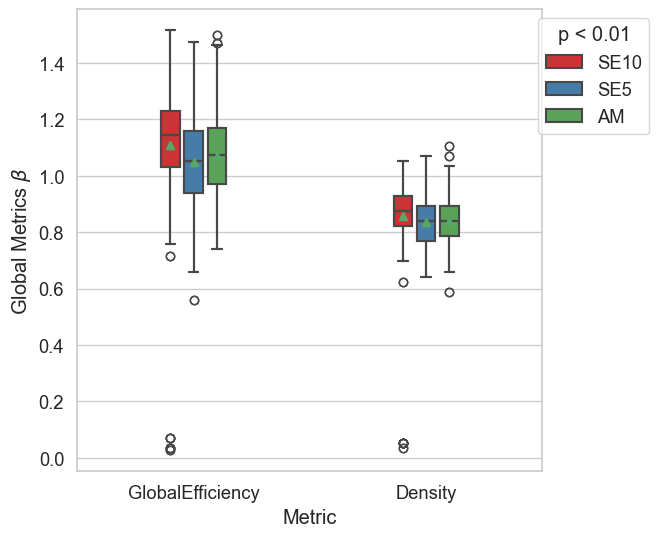

In [656]:
sns.set(style='whitegrid', font_scale=1.2)

df_melted = pd.melt(df, id_vars=['label'], value_vars=df.columns.values[0:2],
                    var_name='Metric', value_name='Value')
#df_melted["Metric"] = df_melted["Metric"].apply(lambda x: x.split("_")[0])


plt.figure(figsize=(6, 6))

sns.boxplot(data=df_melted, x='Metric', y='Value', hue='label', width=0.3, palette='grey', linewidth=1.5, showmeans=True, gap=0.2, legend=False)


for i, col in enumerate(sig_cols):
    if i == 0:
        sns.boxplot(data=df_melted[df_melted['Metric'] == col], x='Metric', y='Value', hue='label', width=0.3, linewidth=1.5, showmeans=True, gap=0.2, palette='Set1')
        plt.legend(title='p < 0.01', loc='upper right', bbox_to_anchor=(1.25, 1))

    else:
        sns.boxplot(data=df_melted[df_melted['Metric'] == col], x='Metric', y='Value', hue='label', width=0.3, linewidth=1.5, showmeans=True, gap=0.2, palette='Set1', legend=False)
        

plt.ylabel(rf'Global Metrics $\{band}$')
plt.xlabel('Metric')
plt.ylabel(rf'Global Metrics $\{band}$')
plt.show()

RL


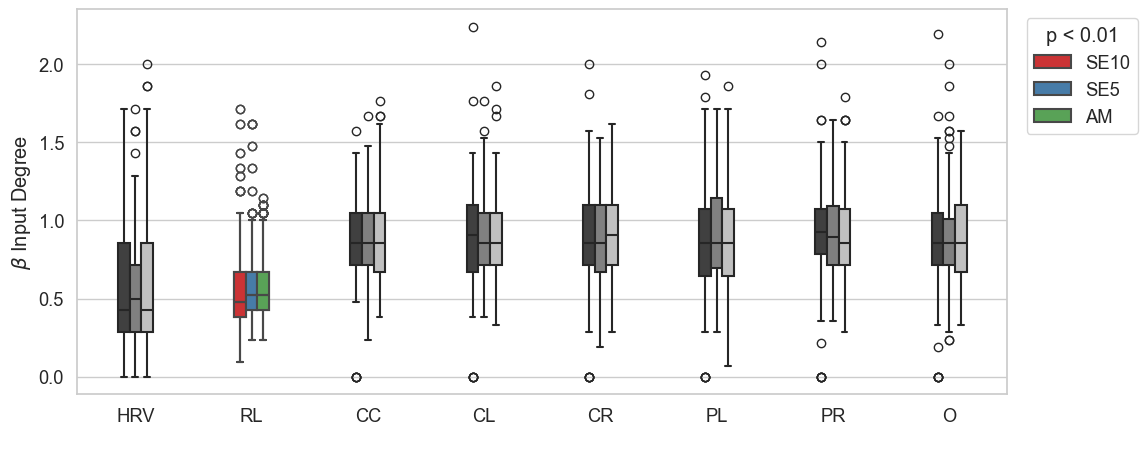

In [657]:
df_melted = pd.melt(df, id_vars=['label'], value_vars=df.columns.values[4:4+ len(groups)],
                    var_name='Metric', value_name='Value')


df_melted["Metric"] = df_melted["Metric"].apply(lambda x: x.split("_")[0])

sig_cols_ = [col for col in sig_cols if "in" in col]
sig_cols_ = list(map(lambda x: x.split("_")[0], sig_cols_))


plt.figure(figsize=(12, 5))
sns.boxplot(data=df_melted, x='Metric', y='Value', hue='label', width=0.3, palette="grey", linewidth=1.5, showmeans=False, legend=False)
siSig = False
for i, col in enumerate(sig_cols_):
    if not siSig:
        if df_melted[df_melted['Metric'] == col].shape[0] > 1:
            siSig = True
            print(col)
            sns.boxplot(data=df_melted[df_melted['Metric'] == col], x='Metric', y='Value', hue='label', width=0.3, linewidth=1.5, showmeans=False, palette='Set1', legend=True)
            plt.legend(title='p < 0.01', loc='upper right', bbox_to_anchor=(1.15, 1))
    else:
        sns.boxplot(data=df_melted[df_melted['Metric'] == col], x='Metric', y='Value', hue='label', width=0.3, linewidth=1.5, showmeans=False, palette='Set1', legend=False)
if siSig == False:
    sns.boxplot(data=df_melted, x='Metric', y='Value', hue='label', width=0.3, palette="grey", linewidth=1.5, showmeans=False, legend=True)
    plt.legend(title='Non significant', loc='upper right', bbox_to_anchor=(1.2, 1))

plt.ylabel(rf'$\{band}$ Input Degree ')
plt.xlabel(" ")
plt.show()

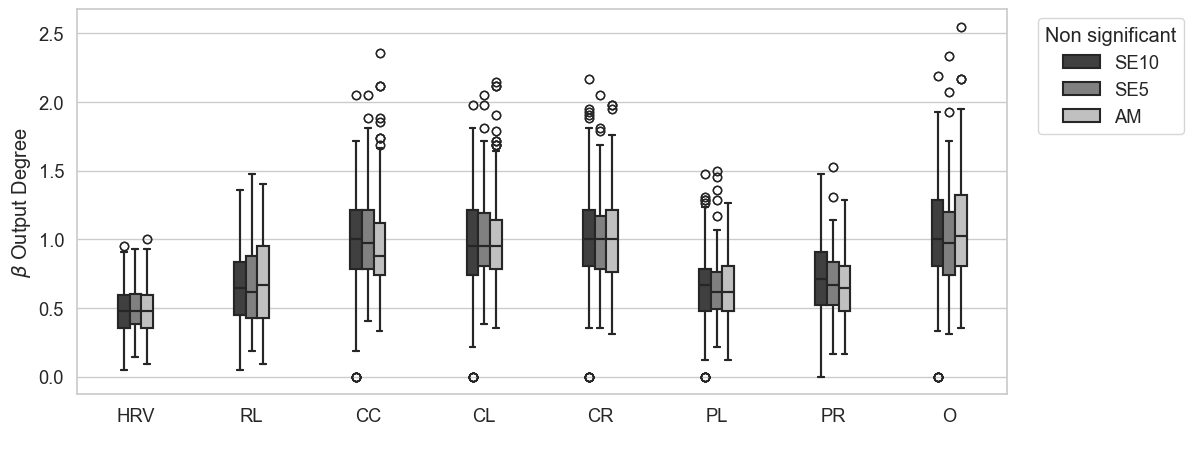

In [658]:
df_melted = pd.melt(df, id_vars=['label'], value_vars=df.columns.values[4 + len(groups): 4 + 2*len(groups)],
                    var_name='Metric', value_name='Value')
df_melted["Metric"] = df_melted["Metric"].apply(lambda x: x.split("_")[0])


sig_cols_ = [col for col in sig_cols if "out" in col]
sig_cols_ = list(map(lambda x: x.split("_")[0], sig_cols_))



plt.figure(figsize=(12, 5))
sns.boxplot(data=df_melted, x='Metric', y='Value', hue='label', width=0.3, palette="grey", linewidth=1.5, showmeans=False, legend=False)
siSig = False
for i, col in enumerate(sig_cols_):
    if not siSig:
        if df_melted[df_melted['Metric'] == col].shape[0] > 1:
            siSig = True
            print(col)
            sns.boxplot(data=df_melted[df_melted['Metric'] == col], x='Metric', y='Value', hue='label', width=0.3, linewidth=1.5, showmeans=False, palette='Set1', legend=True)
            plt.legend(title='p < 0.01', loc='upper right', bbox_to_anchor=(1.15, 1))
    else:
        sns.boxplot(data=df_melted[df_melted['Metric'] == col], x='Metric', y='Value', hue='label', width=0.3, linewidth=1.5, showmeans=False, palette='Set1', legend=False)
if siSig == False:
    sns.boxplot(data=df_melted, x='Metric', y='Value', hue='label', width=0.3, palette="grey", linewidth=1.5, showmeans=False, legend=True)
    plt.legend(title='Non significant', loc='upper right', bbox_to_anchor=(1.2, 1))

plt.ylabel(rf'$\{band}$ Output Degree ')
plt.xlabel(" ")
plt.show()

HRV


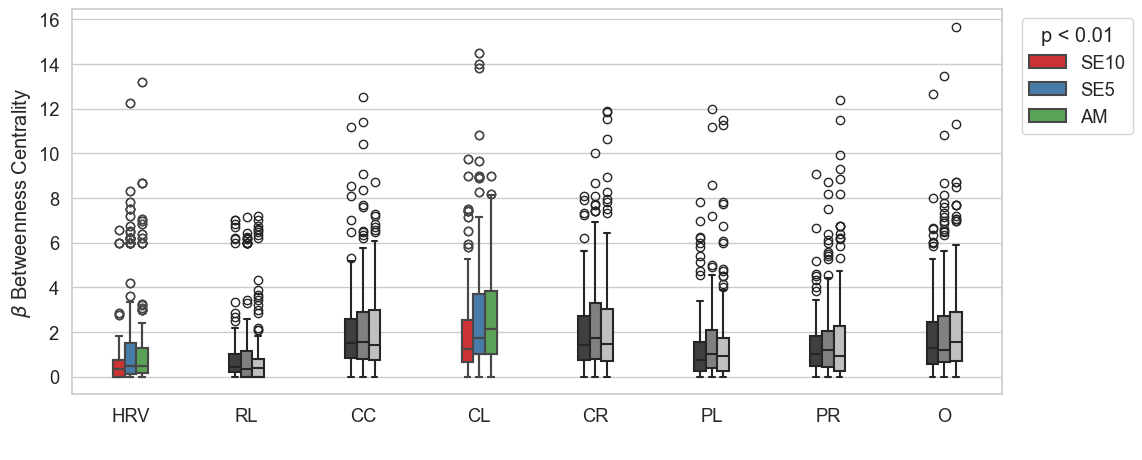

In [659]:
df_melted = pd.melt(df, id_vars=['label'], value_vars=df.columns.values[4 + 3*len(groups):],
                    var_name='Metric', value_name='Value')
df_melted["Metric"] = df_melted["Metric"].apply(lambda x: x.split("_")[0])

sig_cols_ = [col for col in sig_cols if "betweenness" in col]
sig_cols_ = list(map(lambda x: x.split("_")[0], sig_cols_))
sig_cols_


plt.figure(figsize=(12, 5))
sns.boxplot(data=df_melted, x='Metric', y='Value', hue='label', width=0.3, palette="grey", linewidth=1.5, showmeans=False, legend=False)
siSig = False
for i, col in enumerate(sig_cols_):
    if not siSig:
        if df_melted[df_melted['Metric'] == col].shape[0] > 1:
            siSig = True
            print(col)
            sns.boxplot(data=df_melted[df_melted['Metric'] == col], x='Metric', y='Value', hue='label', width=0.3, linewidth=1.5, showmeans=False, palette='Set1', legend=True)
            plt.legend(title='p < 0.01', loc='upper right', bbox_to_anchor=(1.15, 1))
    else:
        sns.boxplot(data=df_melted[df_melted['Metric'] == col], x='Metric', y='Value', hue='label', width=0.3, linewidth=1.5, showmeans=False, palette='Set1', legend=False)
if siSig == False:
    sns.boxplot(data=df_melted, x='Metric', y='Value', hue='label', width=0.3, palette="grey", linewidth=1.5, showmeans=False, legend=True)
    plt.legend(title='Non significant', loc='upper right', bbox_to_anchor=(1.2, 1))

plt.ylabel(rf'$\{band}$ Betweenness Centrality')
plt.xlabel(" ")
plt.show()

RL
HRV


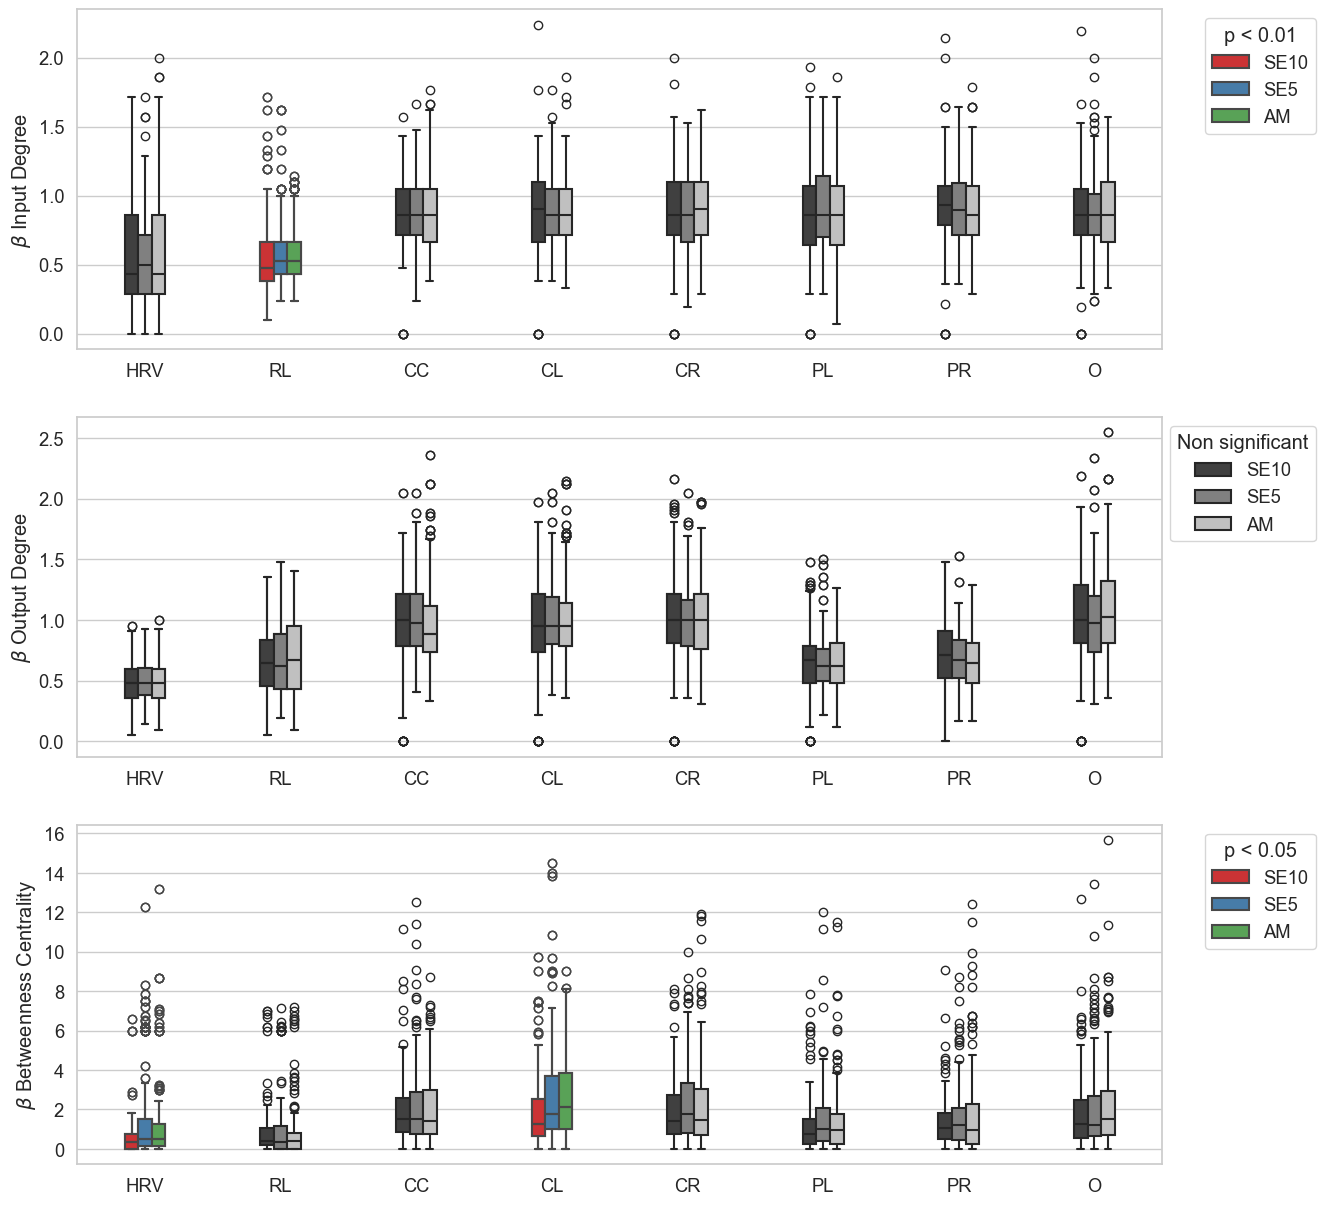

In [ ]:
plt.figure(figsize=(14, 15))
plt.subplot(3, 1, 1)

df_melted = pd.melt(df, id_vars=['label'], value_vars=df.columns.values[4:4+ len(groups)],
                    var_name='Metric', value_name='Value')


df_melted["Metric"] = df_melted["Metric"].apply(lambda x: x.split("_")[0])

sig_cols_ = [col for col in sig_cols if "in" in col]
sig_cols_ = list(map(lambda x: x.split("_")[0], sig_cols_))


sns.boxplot(data=df_melted, x='Metric', y='Value', hue='label', width=0.3, palette="grey", linewidth=1.5, showmeans=False, legend=False)
siSig = False
for i, col in enumerate(sig_cols_):
    if not siSig:
        if df_melted[df_melted['Metric'] == col].shape[0] > 1:
            siSig = True
            print(col)
            sns.boxplot(data=df_melted[df_melted['Metric'] == col], x='Metric', y='Value', hue='label', width=0.3, linewidth=1.5, showmeans=False, palette='Set1', legend=True)
            plt.legend(title='p < 0.01', loc='upper right', bbox_to_anchor=(1.15, 1))
    else:
        sns.boxplot(data=df_melted[df_melted['Metric'] == col], x='Metric', y='Value', hue='label', width=0.3, linewidth=1.5, showmeans=False, palette='Set1', legend=False)
if siSig == False:
    sns.boxplot(data=df_melted, x='Metric', y='Value', hue='label', width=0.3, palette="grey", linewidth=1.5, showmeans=False, legend=True)
    plt.legend(title='Non significant', loc='upper right', bbox_to_anchor=(1.15, 1))

plt.ylabel(rf'$\{band}$ Input Degree ')
plt.xlabel(" ")

plt.subplot(3, 1, 2)


df_melted = pd.melt(df, id_vars=['label'], value_vars=df.columns.values[4 + len(groups): 4 + 2*len(groups)],
                    var_name='Metric', value_name='Value')
df_melted["Metric"] = df_melted["Metric"].apply(lambda x: x.split("_")[0])


sig_cols_ = [col for col in sig_cols if "out" in col]
sig_cols_ = list(map(lambda x: x.split("_")[0], sig_cols_))



sns.boxplot(data=df_melted, x='Metric', y='Value', hue='label', width=0.3, palette="grey", linewidth=1.5, showmeans=False, legend=False)
siSig = False
for i, col in enumerate(sig_cols_):
    if not siSig:
        if df_melted[df_melted['Metric'] == col].shape[0] > 1:
            siSig = True
            print(col)
            sns.boxplot(data=df_melted[df_melted['Metric'] == col], x='Metric', y='Value', hue='label', width=0.3, linewidth=1.5, showmeans=False, palette='Set1', legend=True)
            plt.legend(title='p < 0.05', loc='upper right', bbox_to_anchor=(1.15, 1))
    else:
        sns.boxplot(data=df_melted[df_melted['Metric'] == col], x='Metric', y='Value', hue='label', width=0.3, linewidth=1.5, showmeans=False, palette='Set1', legend=False)
if siSig == False:
    sns.boxplot(data=df_melted, x='Metric', y='Value', hue='label', width=0.3, palette="grey", linewidth=1.5, showmeans=False, legend=True)
    plt.legend(title='Non significant', loc='upper right', bbox_to_anchor=(1.15, 1))

plt.ylabel(rf'$\{band}$ Output Degree ')
plt.xlabel(" ")

plt.subplot(3, 1, 3)

df_melted = pd.melt(df, id_vars=['label'], value_vars=df.columns.values[4 + 3*len(groups):],
                    var_name='Metric', value_name='Value')
df_melted["Metric"] = df_melted["Metric"].apply(lambda x: x.split("_")[0])

sig_cols_ = [col for col in sig_cols if "betweenness" in col]
sig_cols_ = list(map(lambda x: x.split("_")[0], sig_cols_))
sig_cols_


sns.boxplot(data=df_melted, x='Metric', y='Value', hue='label', width=0.3, palette="grey", linewidth=1.5, showmeans=False, legend=False)
siSig = False
for i, col in enumerate(sig_cols_):
    if not siSig:
        if df_melted[df_melted['Metric'] == col].shape[0] > 1:
            siSig = True
            print(col)
            sns.boxplot(data=df_melted[df_melted['Metric'] == col], x='Metric', y='Value', hue='label', width=0.3, linewidth=1.5, showmeans=False, palette='Set1', legend=True)
            plt.legend(title='p < 0.05', loc='upper right', bbox_to_anchor=(1.15, 1))
    else:
        sns.boxplot(data=df_melted[df_melted['Metric'] == col], x='Metric', y='Value', hue='label', width=0.3, linewidth=1.5, showmeans=False, palette='Set1', legend=False)
if siSig == False:
    sns.boxplot(data=df_melted, x='Metric', y='Value', hue='label', width=0.3, palette="grey", linewidth=1.5, showmeans=False, legend=True)
    plt.legend(title='Non significant', loc='upper right', bbox_to_anchor=(1.15, 1))

plt.ylabel(rf'$\{band}$ Betweenness Centrality')
plt.xlabel(" ")
plt.show()